In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import re
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2


pd.options.display.max_rows = 100
pd.options.mode.copy_on_write = True

In [206]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
df.describe()


no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  ...    ph_100g  \
count  2.611130e+05            857.000000  243891.000000  ...  49.000000   
mean   1.141915e+03            585.501214      12.730379  ...   6.425698   
std    6.447154e+03            712.809943      17.578747  ...   2.047841   
min    0.000000e+00              0.000000       0.000000  ...   0.000000   
25%    3.770000e+02             49.400000       0.000000  ...   6.300000   
50%    1.100000e+03            300.000000       5.000000  ...   7.200000   
75%    1.674000e+03            898.000000      20.000000  ...   7.400000   
max    3.251373e+06           3830.000000     714.290000  ...   8.400000   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count  948.000000              0.0             268.000000   
mean    49.547785              NaN             341.700764   
std     18.757932              NaN             425.211439   
min      6.000000              NaN               0.000000   
25%     32.000000              NaN              98.750000   
50%     50.000000              NaN             195.750000   
75%     64.250000              NaN             383.200000   
max    100.000000              NaN            2842.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
count            221210.000000            221210.000000                  0.0   
mean                  9.165535             

In [207]:

df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [208]:
df.drop(columns=['url', 'creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime','countries','countries_tags','countries_fr','image_url','image_small_url','states','states_tags','states_fr'],inplace=True)
cols_to_drop = df.filter(regex='_n$').columns
df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop = df.filter(regex='^state').columns

df.drop(columns=cols_to_drop, inplace=True)

<Axes: >

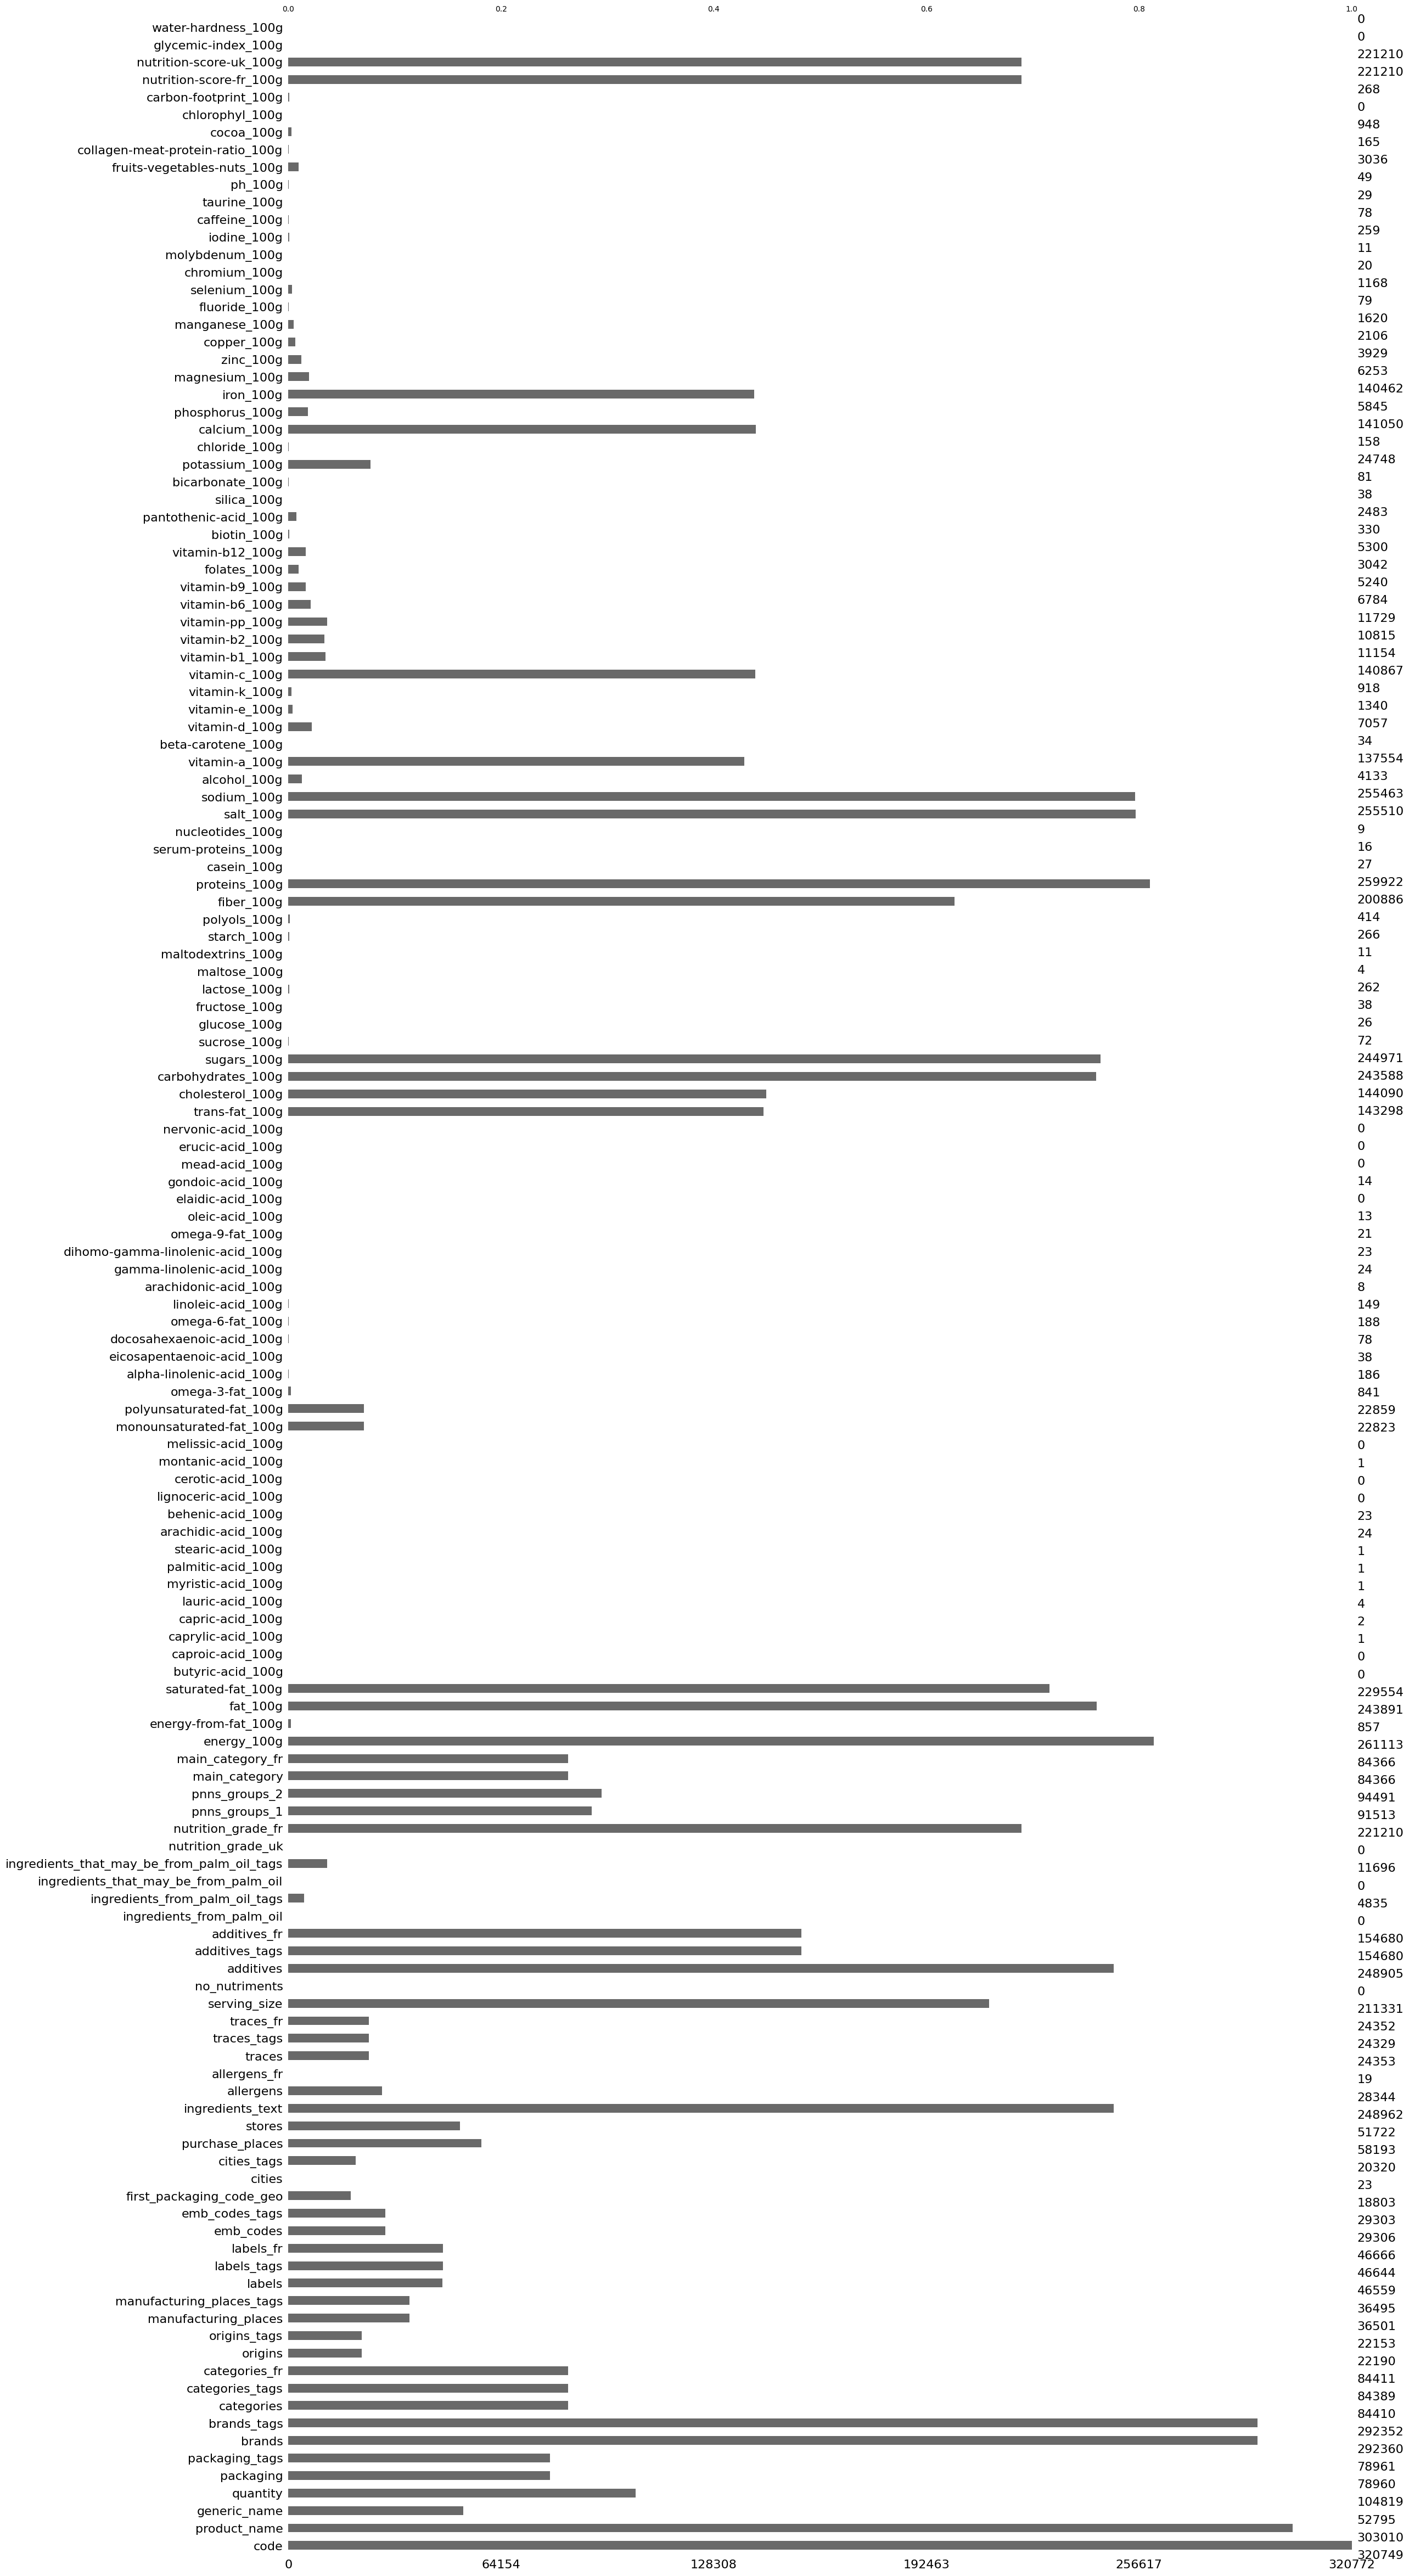

In [209]:
msno.bar(df)

In [210]:

# Calculer le nombre total de lignes
total_rows = len(df)

# Calculer le nombre de valeurs non nulles dans chaque colonne
non_null_counts = df.notna().sum()

# Calculer le taux de remplissage de chaque colonne
filling_rates = non_null_counts / total_rows * 100
filling_rates

# Filtrer les colonnes avec un taux de remplissage entre 20% et 50%
selected_columns = filling_rates[(filling_rates >= 5) ].index
selected_columns
# Conserver uniquement les colonnes sélectionnées
df_cleaned = df[selected_columns]
len(df_cleaned)

320772

<Axes: >

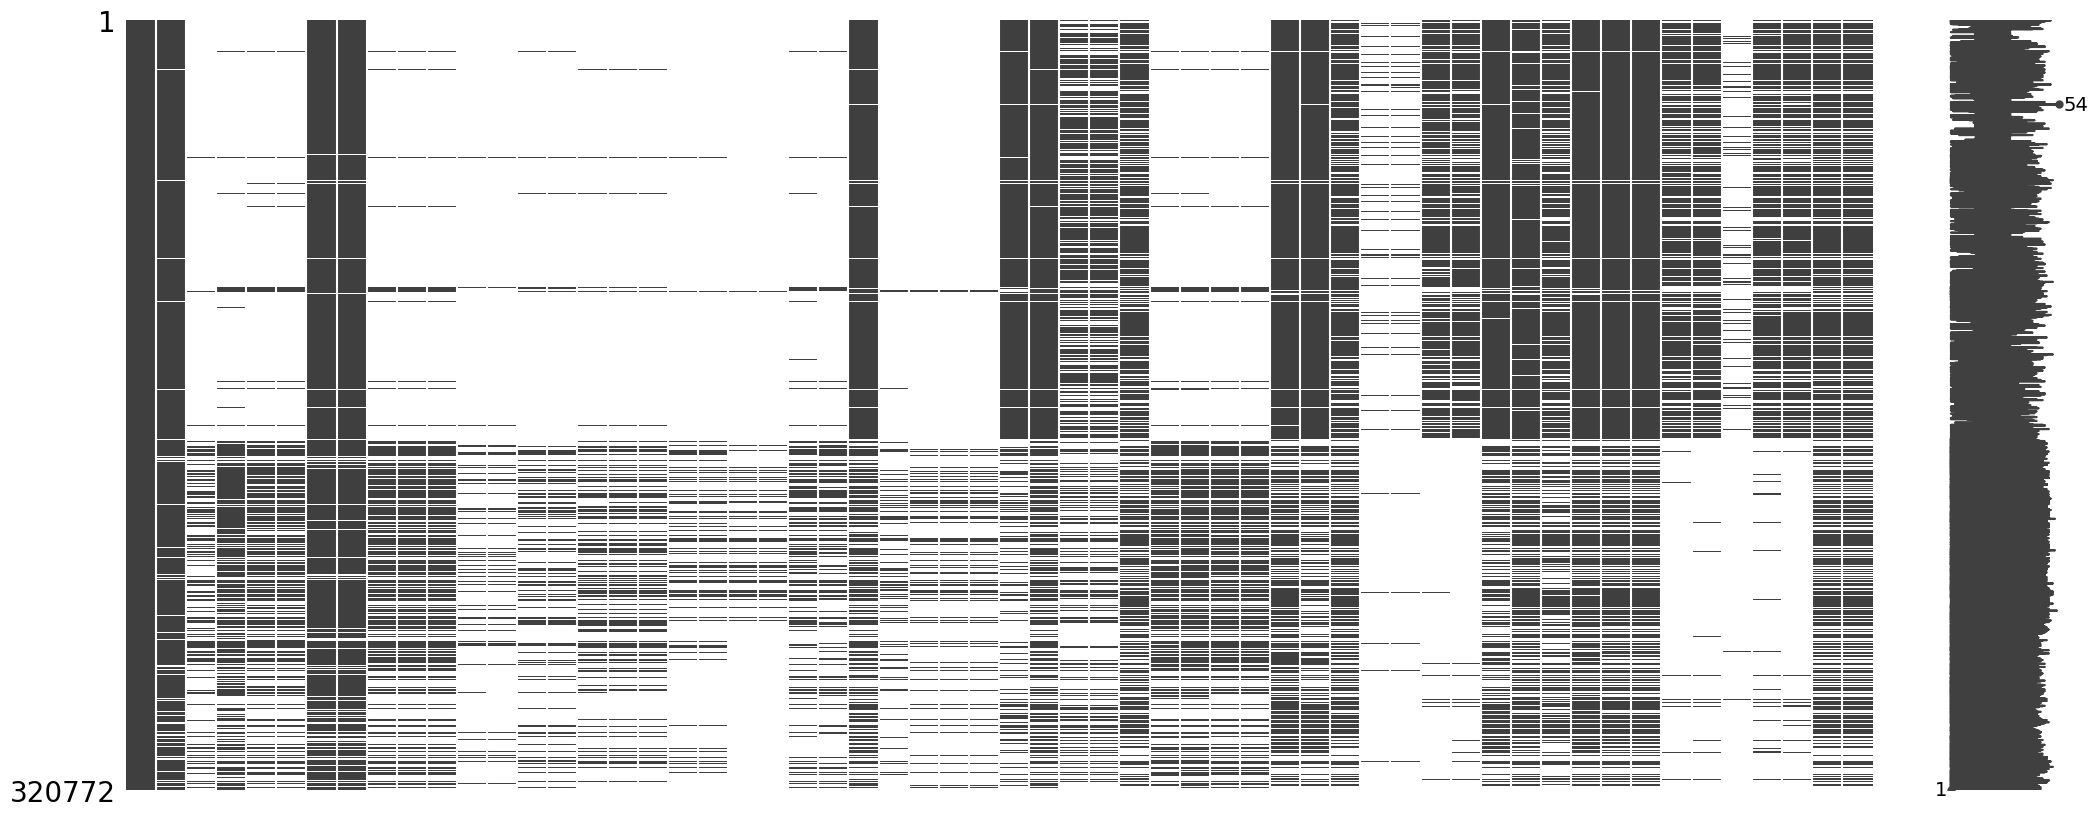

In [211]:
msno.matrix(df_cleaned)

In [212]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])
df_pnns1 = df_cible['pnns_groups_1']

In [213]:
counts = df_pnns1.value_counts().reset_index()
counts.columns = ['pnns_groups_1', 'Counts']
print(df_pnns1.value_counts())
# Créer le graphique avec Plotly
fig = px.bar(counts, x='pnns_groups_1', y='Counts', title='Value Counts de la variable pnns_groups_1')

# Afficher le graphique
fig.show()

pnns_groups_1
unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64


In [214]:
df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"-":" "},regex=True)
df_cleaned['pnns_groups_1']=df_cleaned['pnns_groups_1'].str.lower()
df_cleaned['pnns_groups_1'].value_counts()

pnns_groups_1
unknown                    22624
sugary snacks              12864
beverages                   9033
milk and dairy products     8825
cereals and potatoes        8458
fish meat eggs              8041
fruits and vegetables       6895
composite foods             6747
fat and sauces              5216
salty snacks                2810
Name: count, dtype: int64

In [215]:

df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"unknown":np.nan},regex=True)
df_cleaned['pnns_groups_1'].value_counts()

pnns_groups_1
sugary snacks              12864
beverages                   9033
milk and dairy products     8825
cereals and potatoes        8458
fish meat eggs              8041
fruits and vegetables       6895
composite foods             6747
fat and sauces              5216
salty snacks                2810
Name: count, dtype: int64

<Axes: >

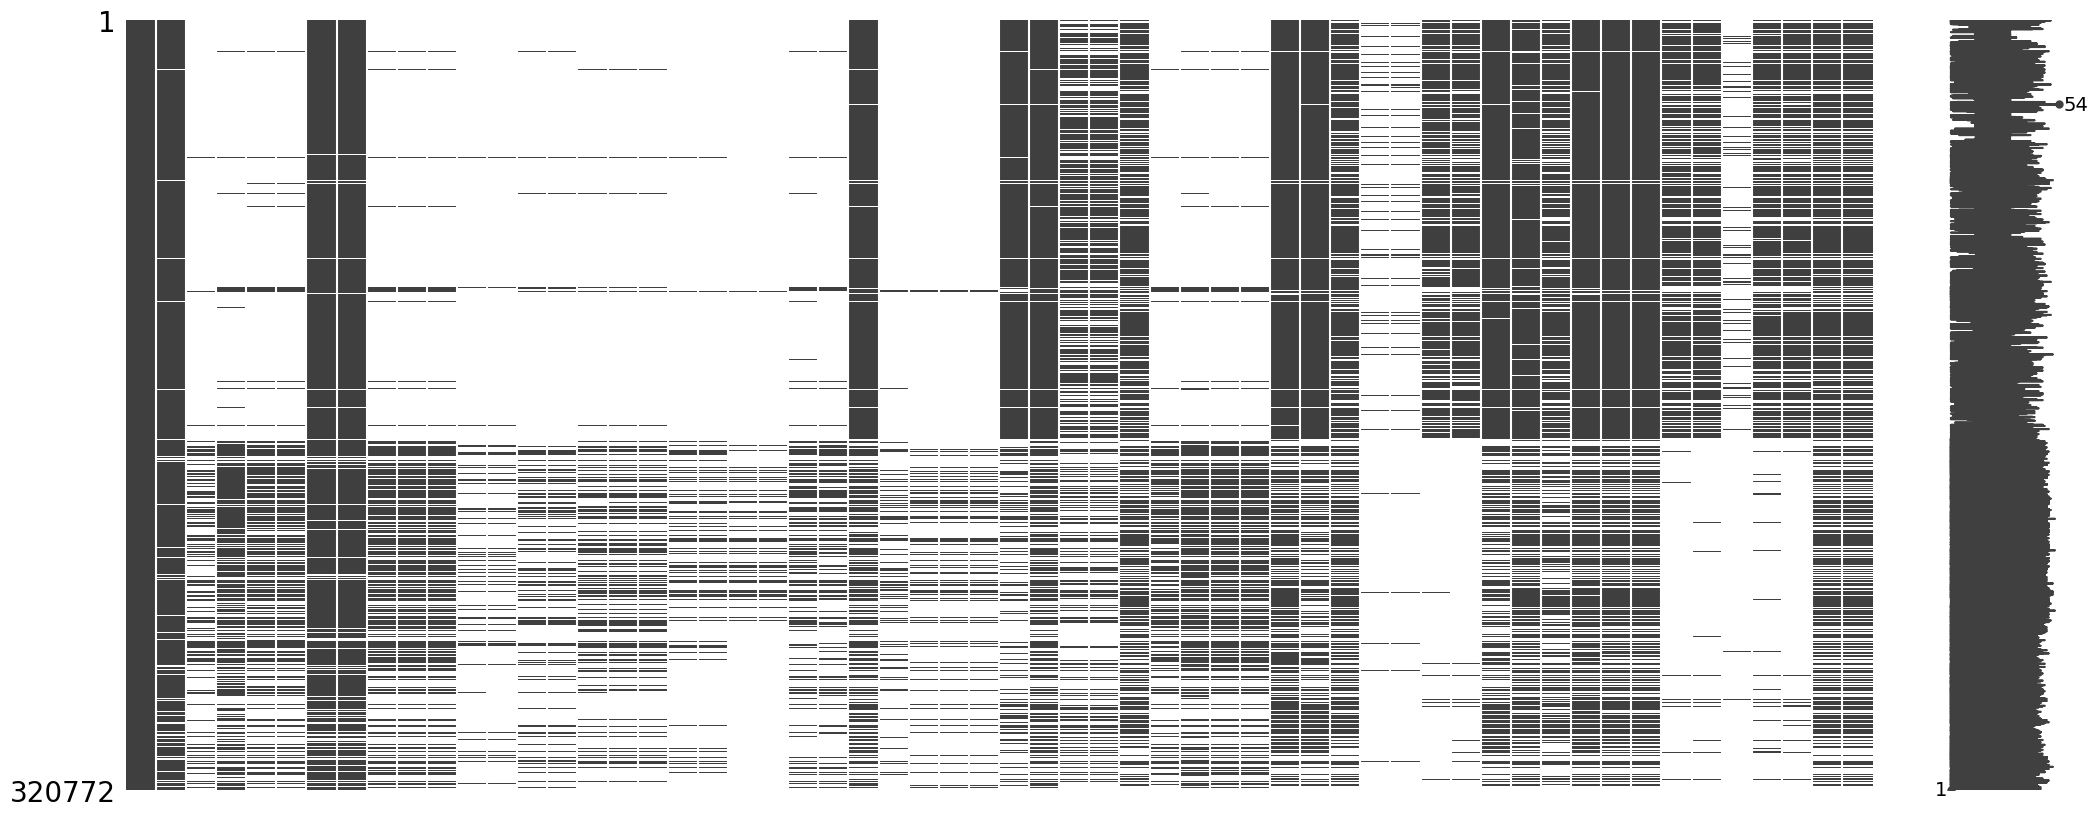

In [216]:
msno.matrix(df_cleaned)

In [217]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])

In [218]:
# Compter le nombre de valeurs non nulles dans la colonne 'ingredients_text'
nombre_de_valeurs_non_nulles = df_cleaned['ingredients_text'].count()

# Calculer le nombre total de lignes dans le DataFrame
nombre_total_de_lignes = len(df_cleaned)

# Calculer le taux de remplissage de la colonne 'ingredients_text'
taux_de_remplissage = (nombre_de_valeurs_non_nulles / nombre_total_de_lignes) * 100
taux_de_remplissage

77.61338271420199

In [219]:
df_pnns1 = df_cleaned['pnns_groups_1']

In [220]:
percentages_before = df_cleaned['pnns_groups_1'].value_counts(normalize=True) * 100

In [221]:
df_pnns1 = df_cleaned['pnns_groups_1']
counts = df_pnns1.value_counts()
percentages = counts / len(df_cleaned)*100
print(percentages)

percentages_df = percentages.reset_index()
percentages_df.columns = ['Valeur', 'Pourcentage']
print(percentages_df)

pnns_groups_1
sugary snacks              4.010325
beverages                  2.816019
milk and dairy products    2.751175
cereals and potatoes       2.636764
fish meat eggs             2.506765
fruits and vegetables      2.149502
composite foods            2.103363
fat and sauces             1.626077
salty snacks               0.876012
Name: count, dtype: float64
                    Valeur  Pourcentage
0            sugary snacks     4.010325
1                beverages     2.816019
2  milk and dairy products     2.751175
3     cereals and potatoes     2.636764
4           fish meat eggs     2.506765
5    fruits and vegetables     2.149502
6          composite foods     2.103363
7           fat and sauces     1.626077
8             salty snacks     0.876012


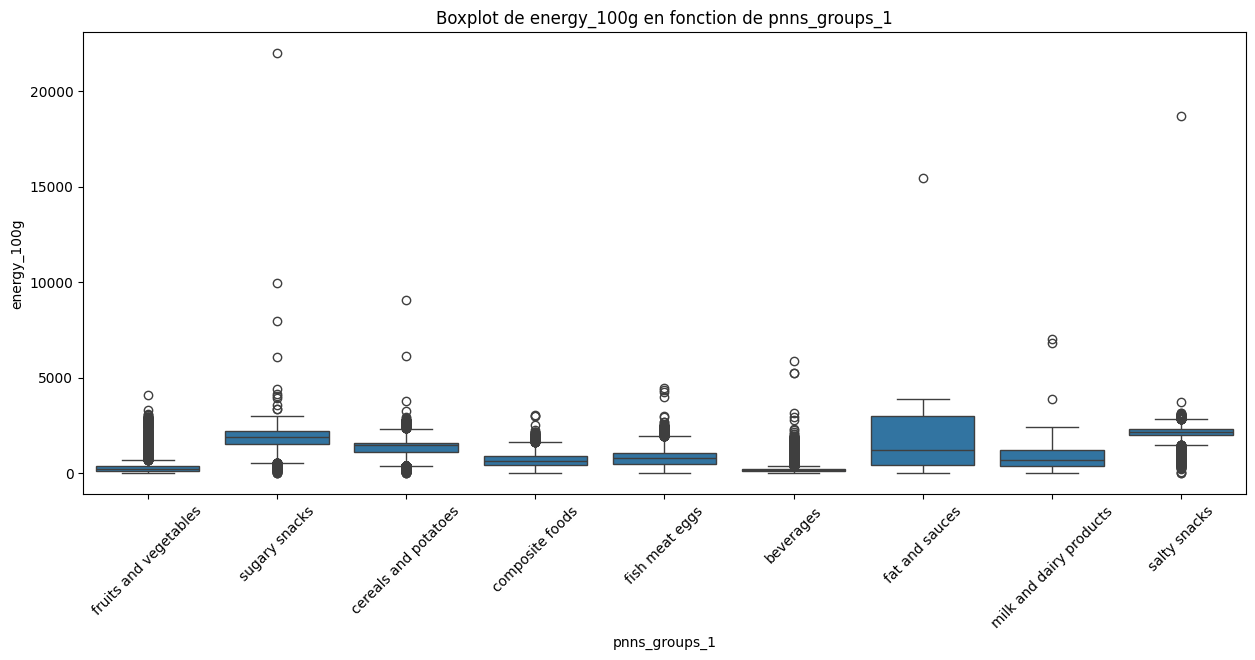

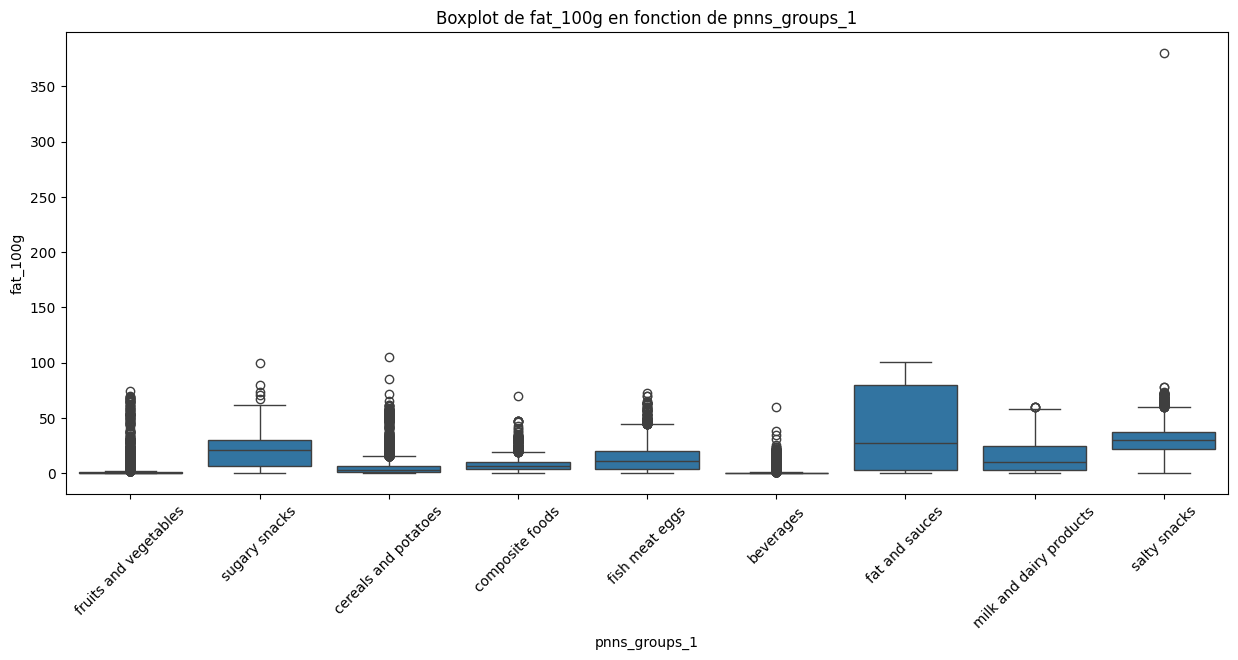

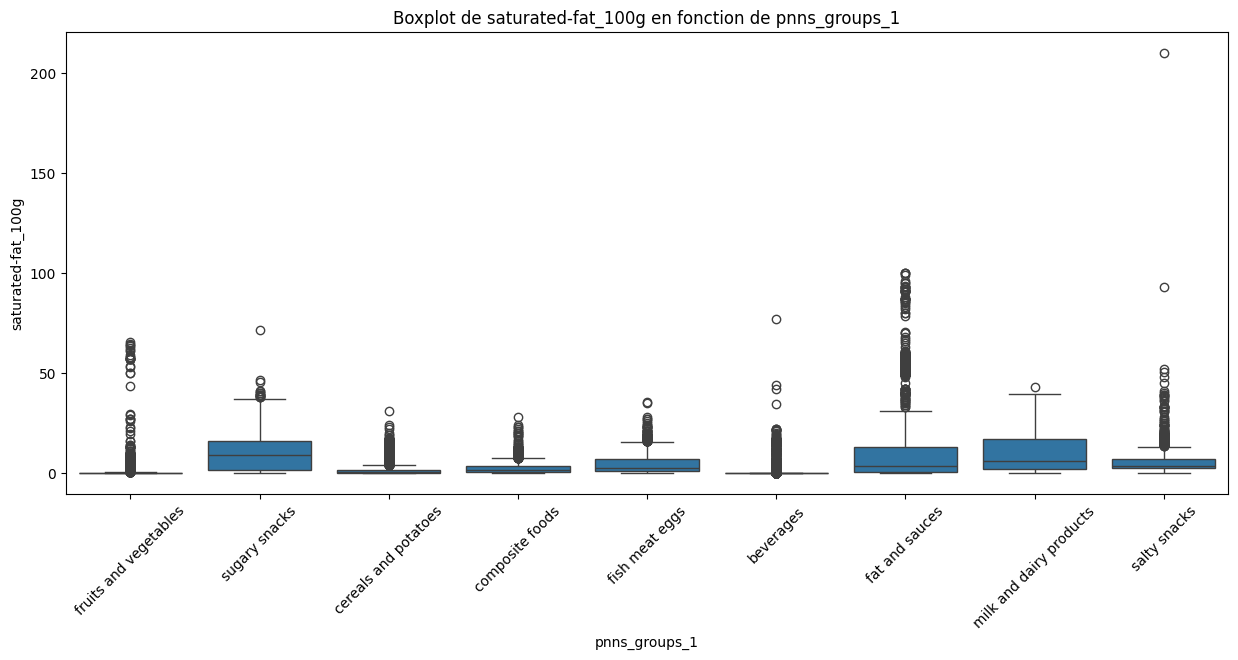

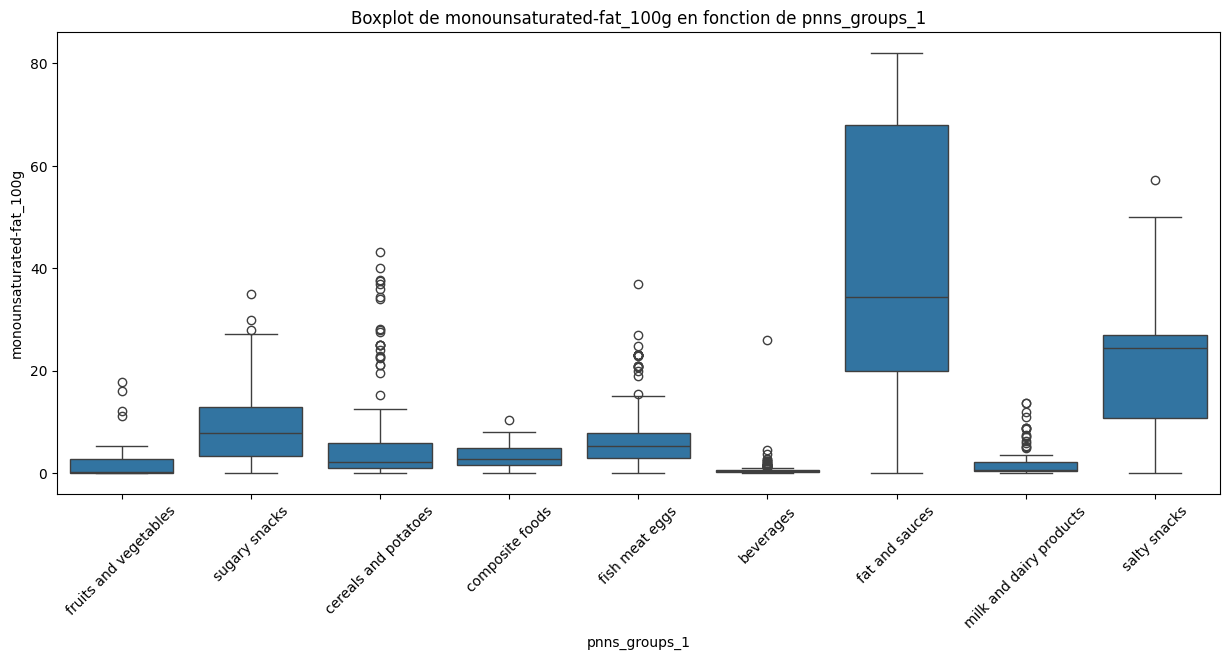

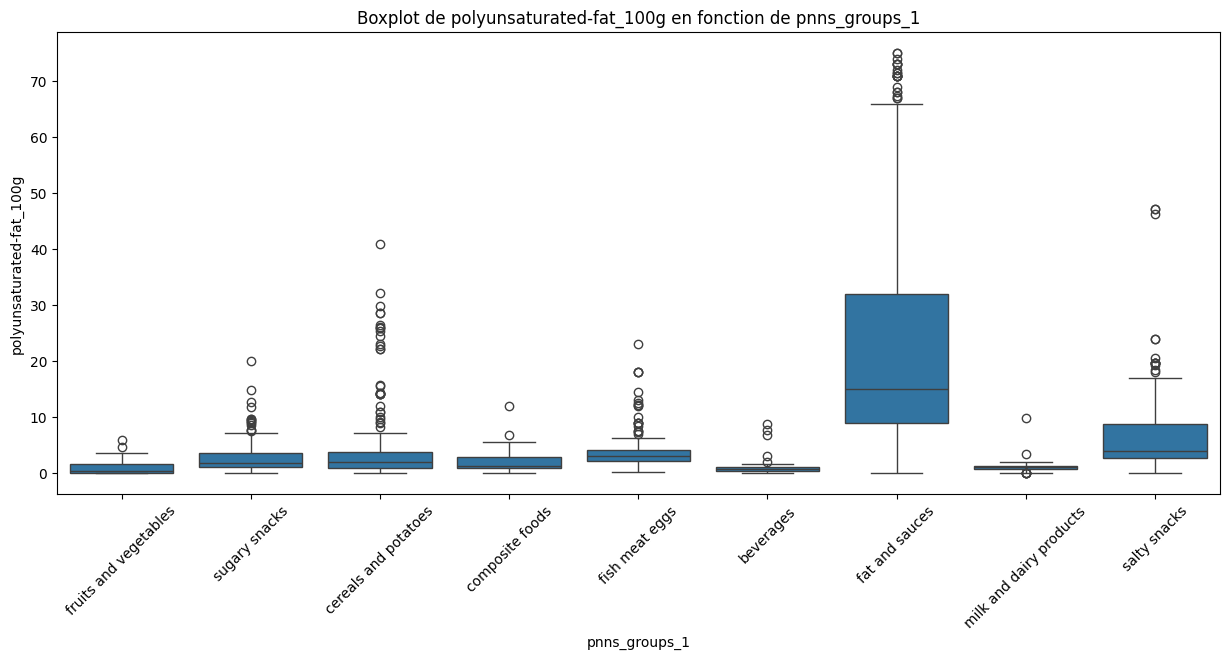

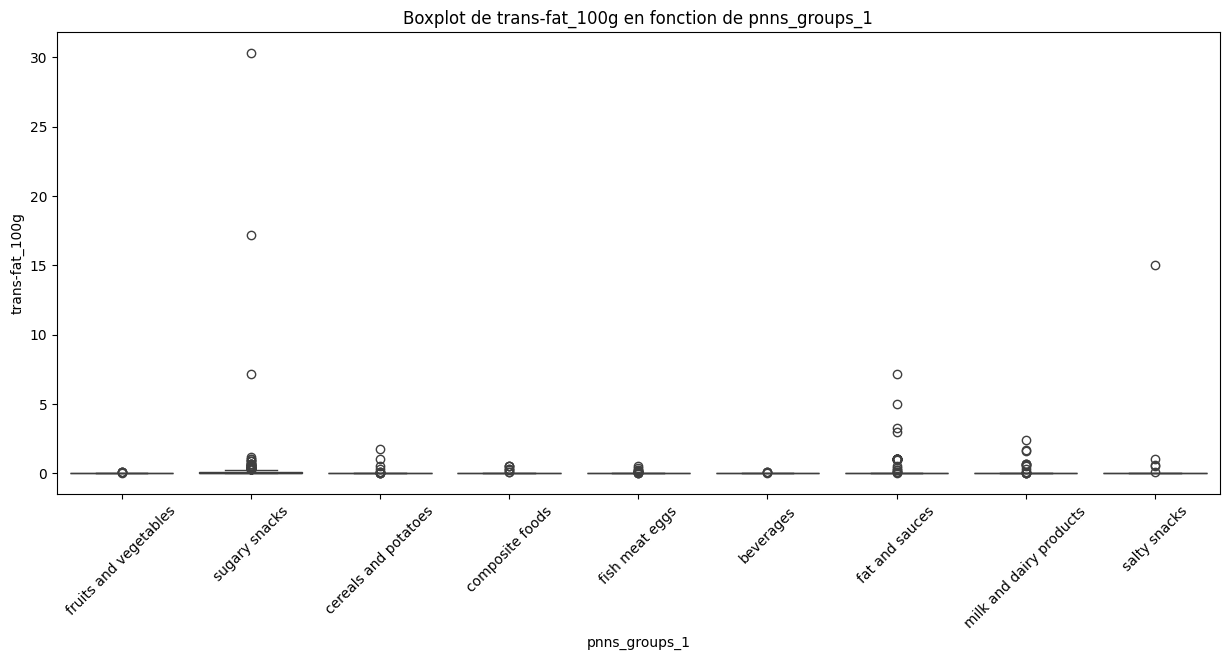

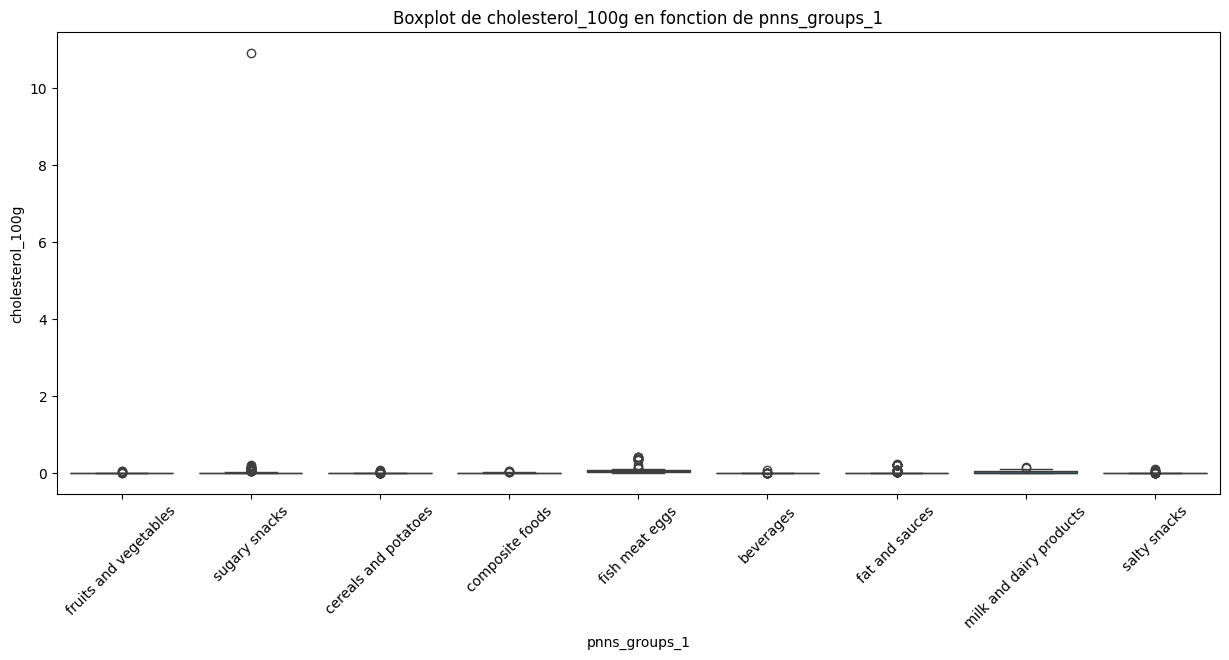

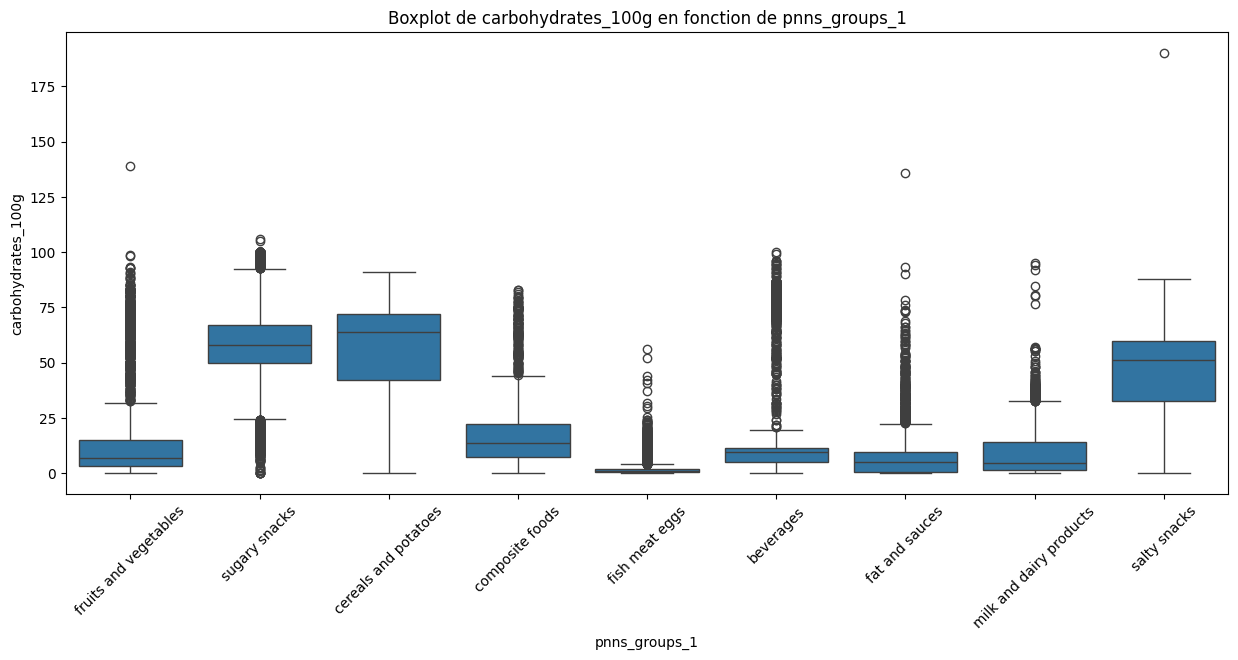

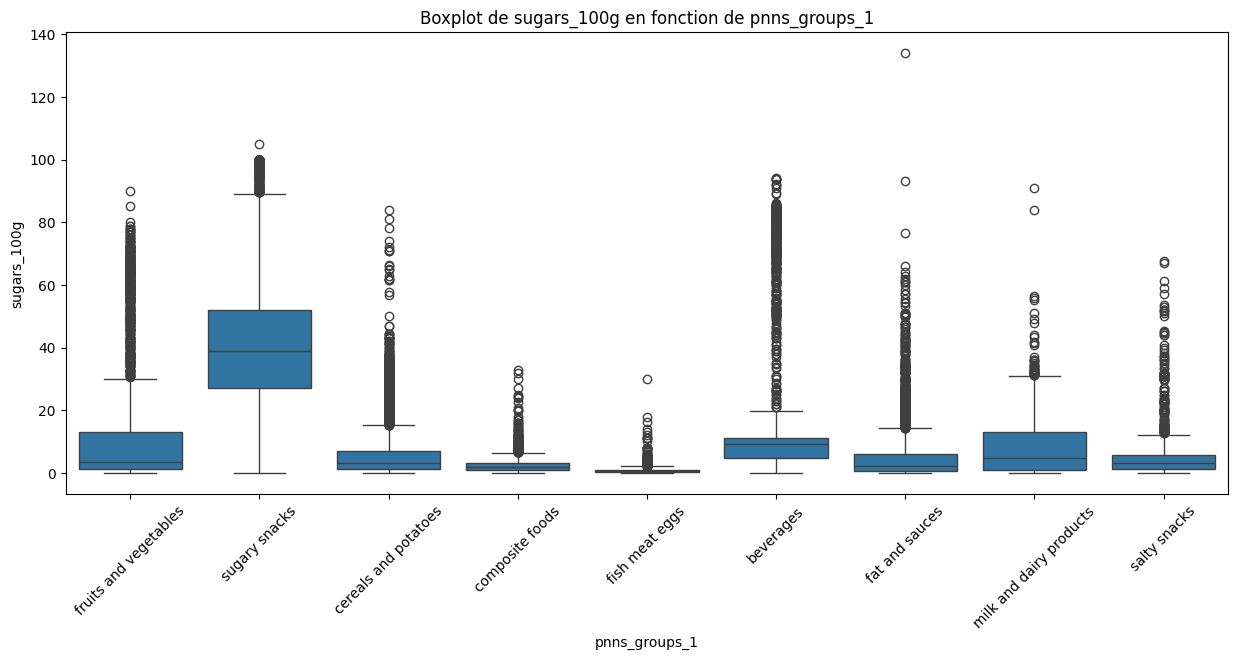

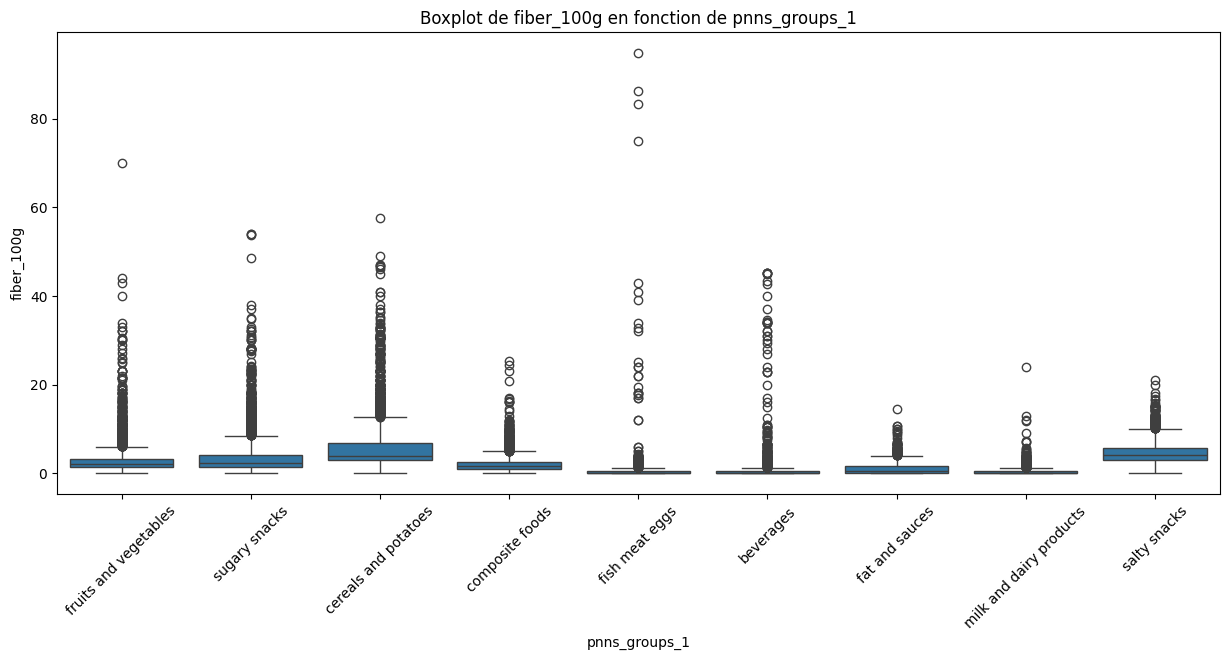

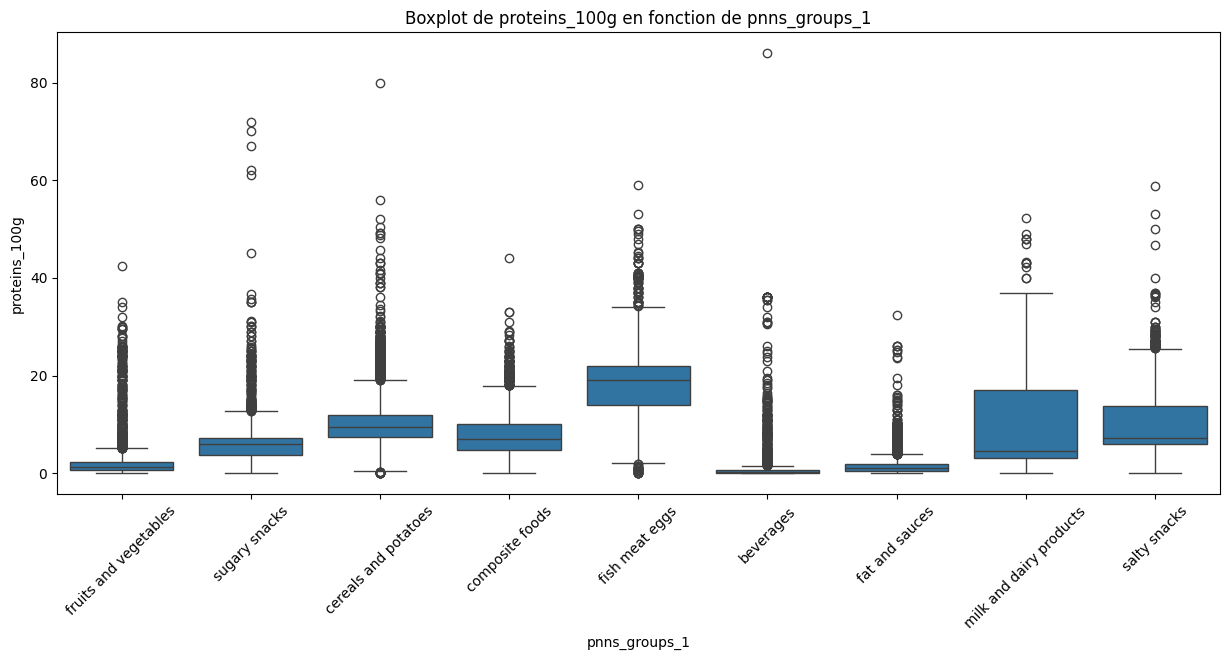

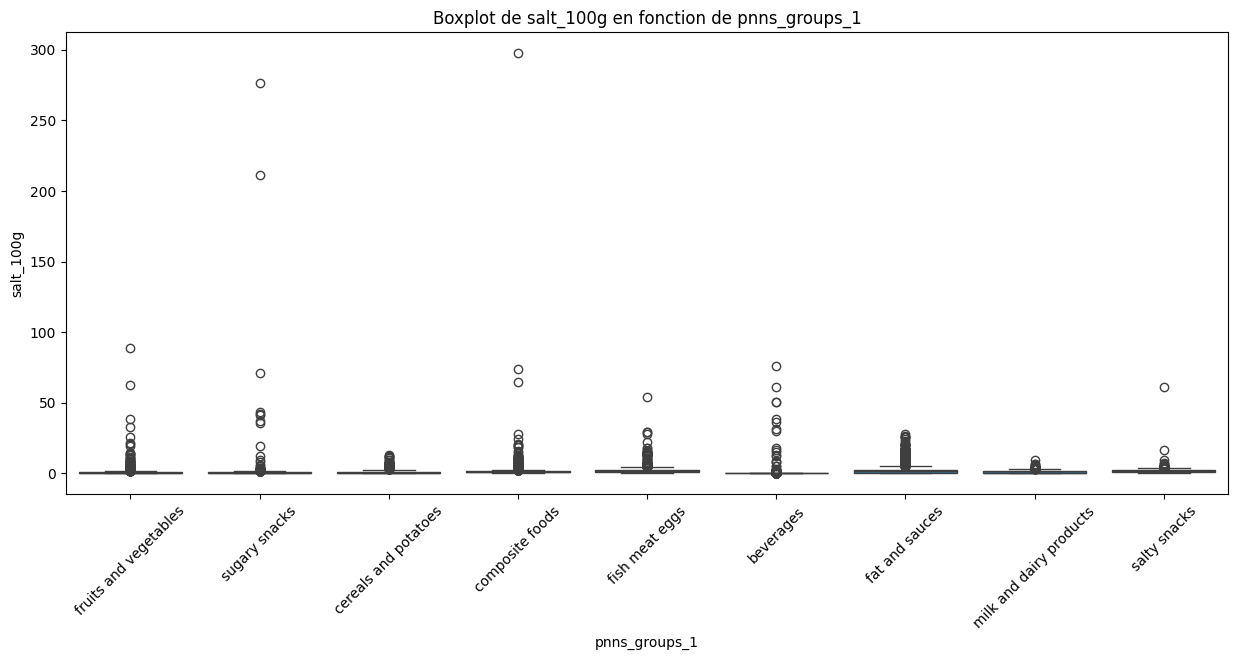

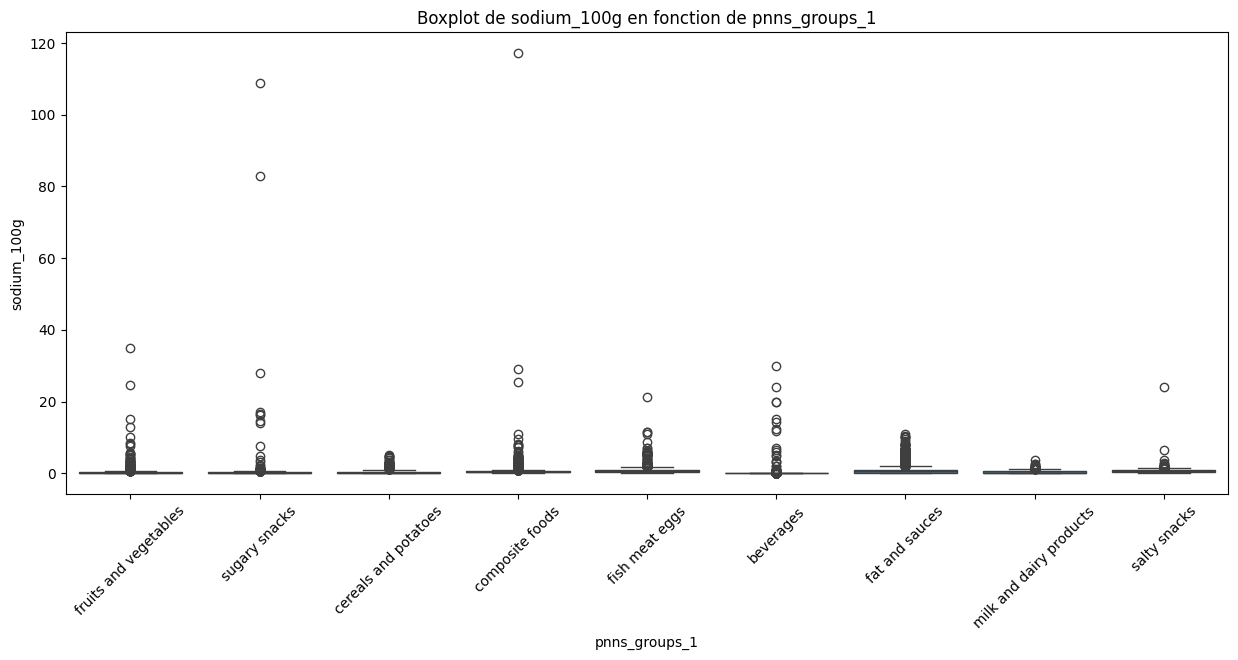

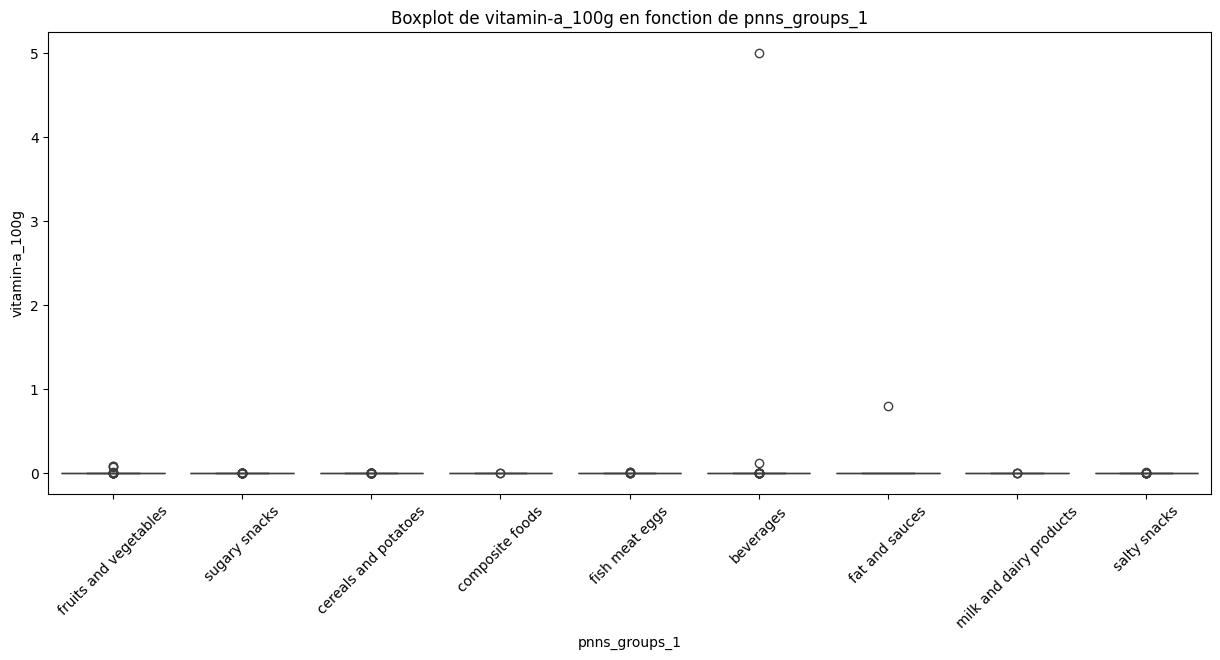

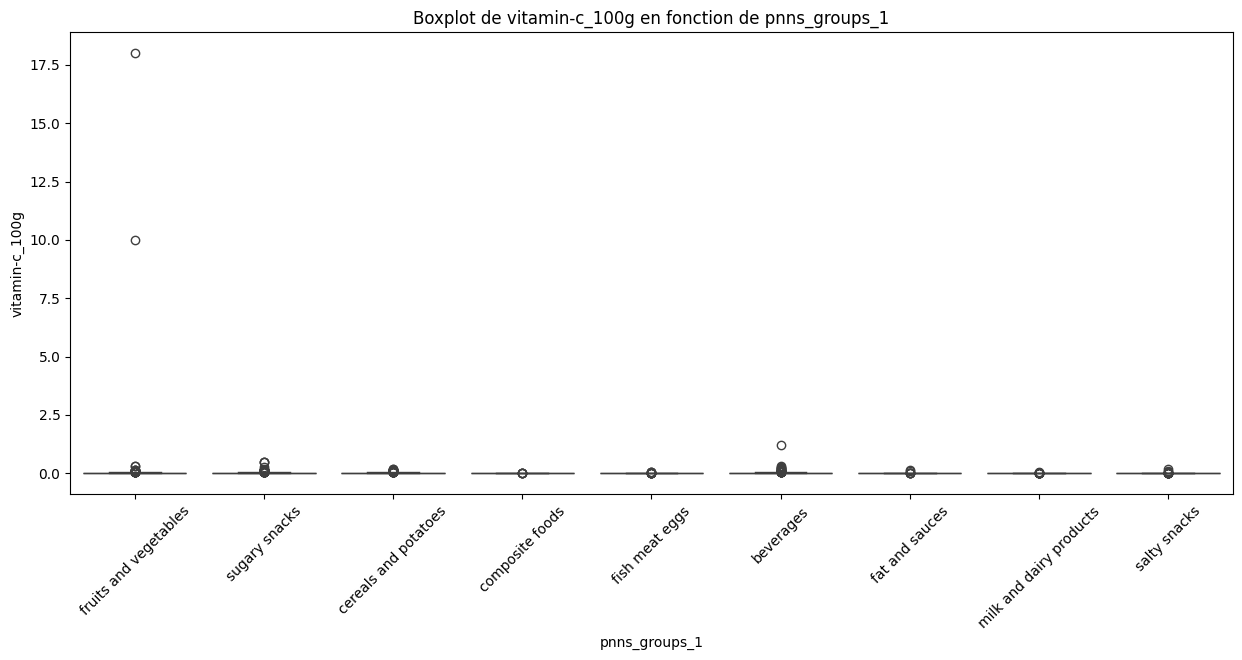

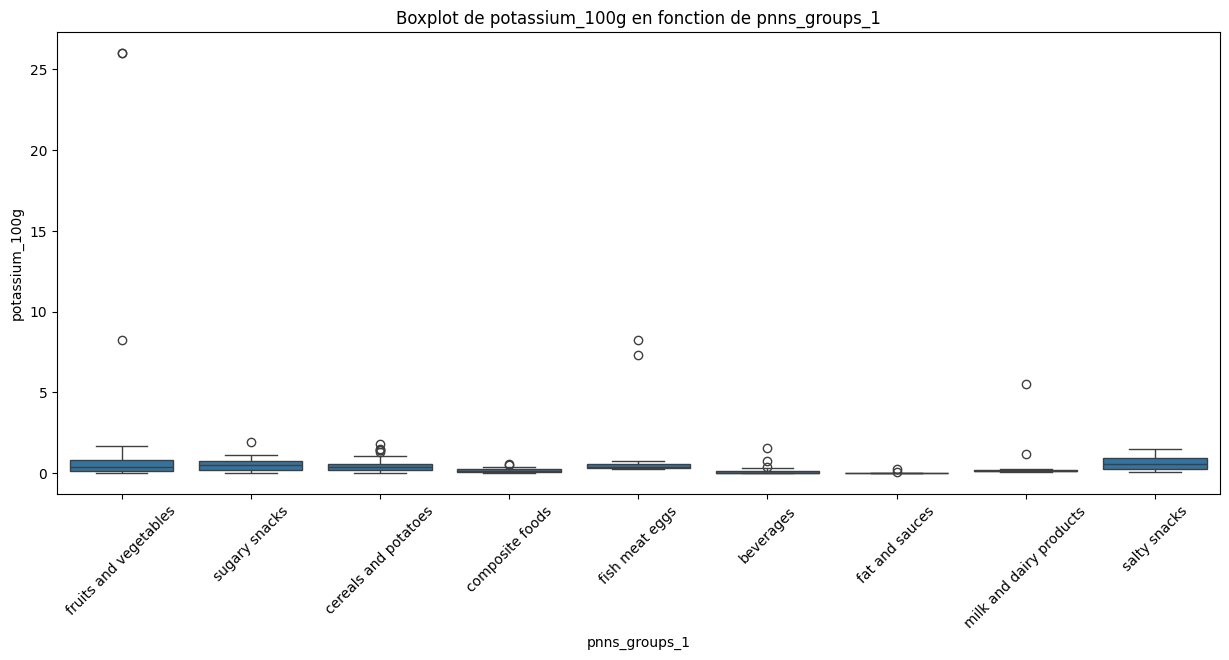

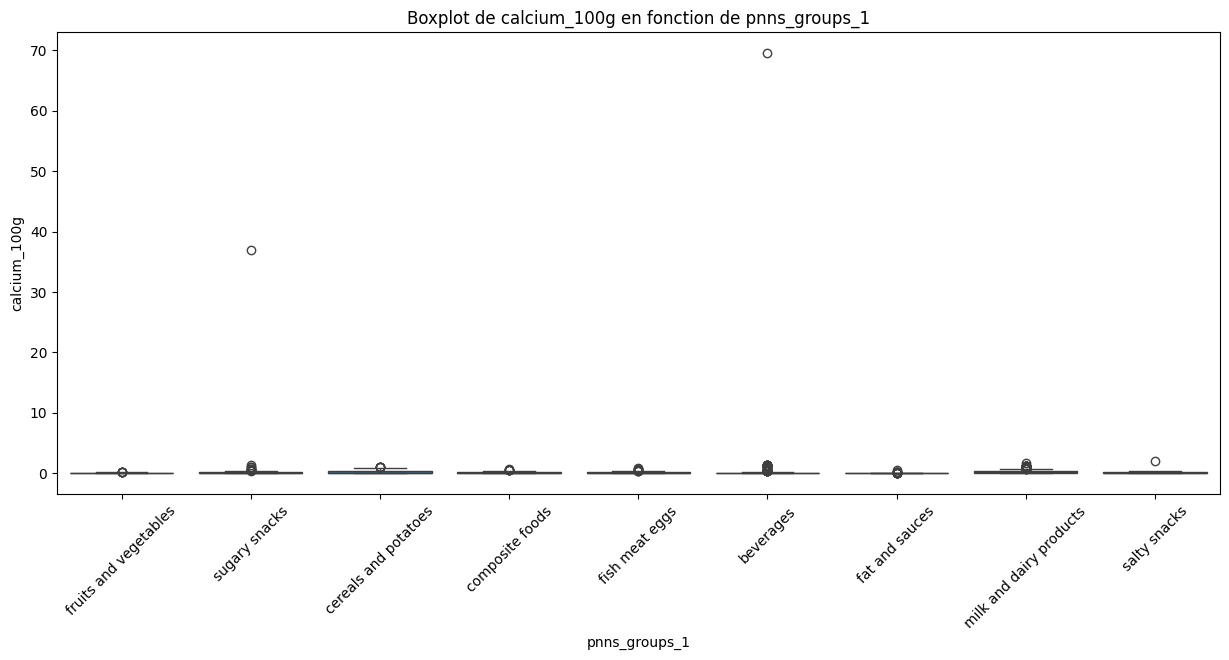

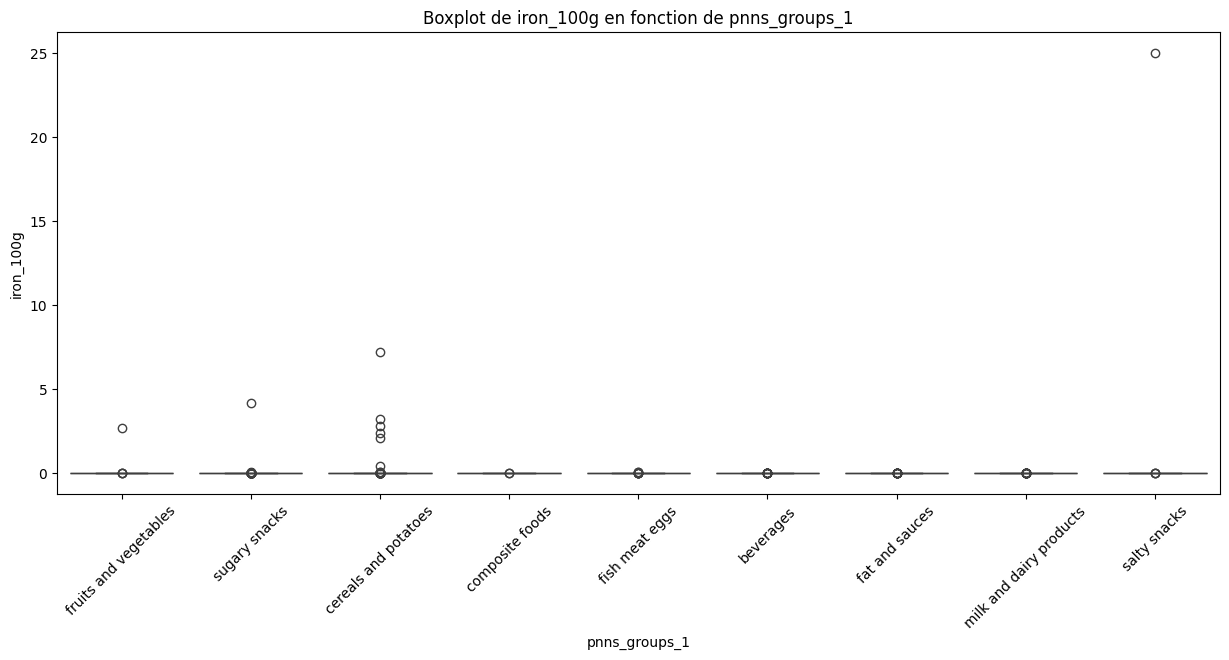

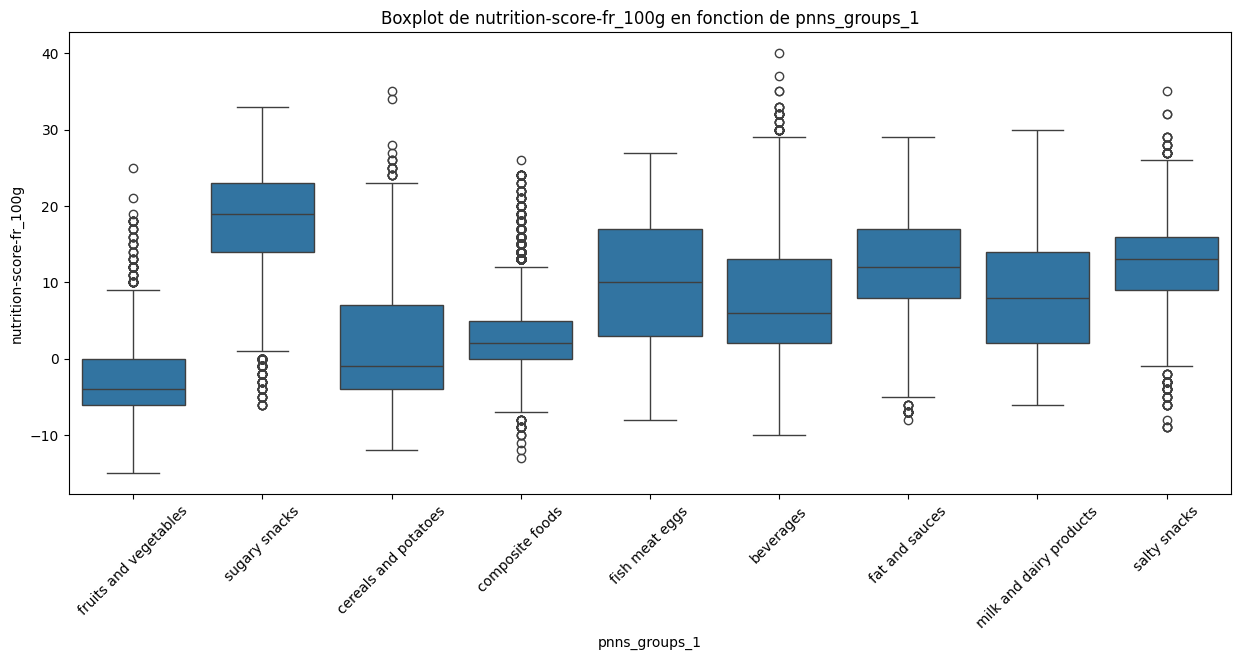

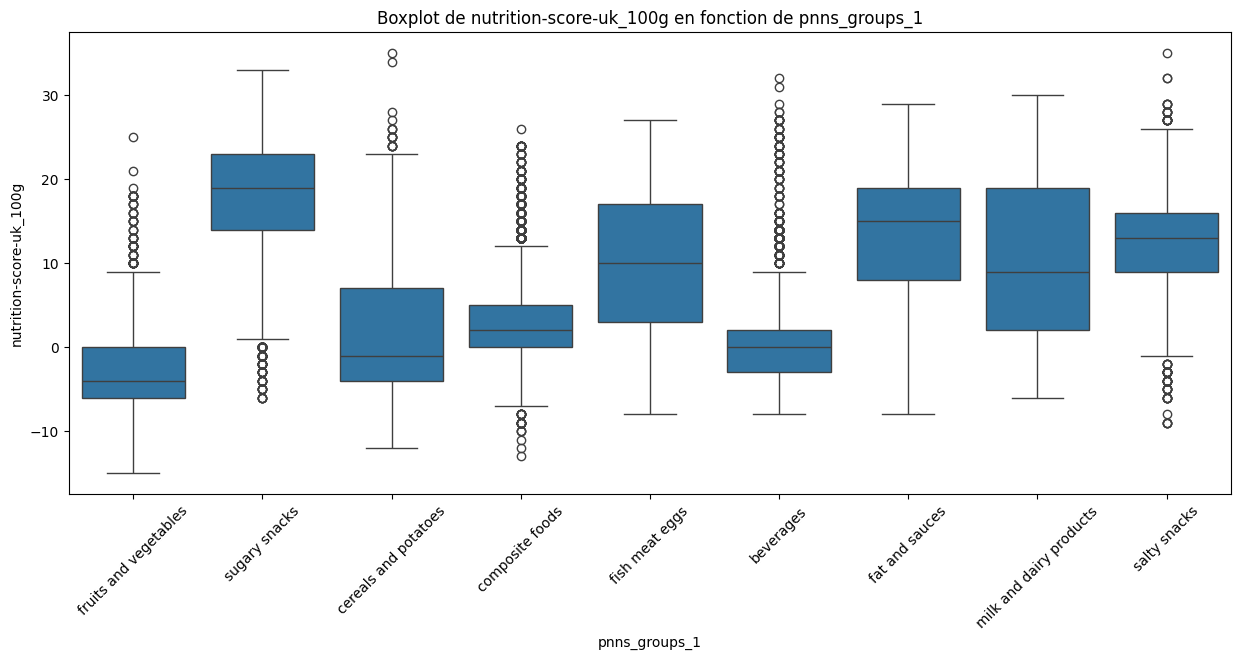

In [222]:
columns_100g = [col for col in df_cleaned.columns if col.endswith('_100g')]
for col in columns_100g:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='pnns_groups_1', y=col, data=df_cleaned)
    plt.title(f'Boxplot de {col} en fonction de pnns_groups_1')
    plt.xlabel('pnns_groups_1')
    plt.xticks(rotation=45)
    plt.ylabel(col)
    plt.show()


# nettoyage de la colonne ingredients_text


In [223]:
# Fonction pour supprimer le texte entre parenthèses
def remove_parentheses(text):
    if isinstance(text, str):
        return re.sub(r'\([^)]*\)', '', text)  # Supprimer le texte entre parenthèses, y compris les espaces
    else:
        return text  # Retourner la valeur d'origine si ce n'est pas une chaîne de caractères




# Appliquer la fonction à la colonne ingredients_text
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].apply(remove_parentheses)
df_cleaned['ingredients_text']=df_cleaned['ingredients_text'].str.lower()
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].str.replace('.', '', regex=False)
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].str.replace('_', ' ', regex=False)
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].str.strip()
df_cleaned_all = df_cleaned.dropna(subset=['ingredients_text'])


In [224]:
non_alphabetic_pattern = re.compile(r'[^\w\s]')

In [225]:
df_cleaned = df_cleaned[df_cleaned['ingredients_text'].apply(lambda x: isinstance(x, str))]
df_cleaned['has_non_alphabetic_ingredients'] = df_cleaned['ingredients_text'].apply(lambda text: non_alphabetic_pattern.search(text) is not None)
len(df_cleaned)

248962

## imputaion du pnns group 1 par KNN 


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
df_cleaned_test = df_cleaned
df_sample = df_cleaned.sample(15000)

In [227]:
# Séparer les lignes avec et sans valeurs manquantes dans pnns_groups_1
df_missing = df_cleaned[df_cleaned['pnns_groups_1'].isna()]
df_not_missing = df_sample[~df_sample['pnns_groups_1'].isna()]

In [228]:
# Toutes les classes possibles 
possible_classes = df_cleaned['pnns_groups_1'].unique()

In [229]:

# Encodage des labels textuels en valeurs numériques
label_encoder = LabelEncoder()
label_encoder.fit(possible_classes)


LabelEncoder()

In [230]:

# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
df_not_missing['pnns_groups_1_encoded'] = label_encoder.transform(df_not_missing['pnns_groups_1'])

In [231]:
# Vectorisation des ingrédients
vectorizer = TfidfVectorizer()
X_not_missing = vectorizer.fit_transform(df_not_missing['ingredients_text'])
y_not_missing = df_not_missing['pnns_groups_1_encoded']


In [232]:
# Division des données non manquantes pour train et test
X_train, X_test, y_train, y_test = train_test_split(X_not_missing, y_not_missing, test_size=0.3, random_state=42)


In [233]:
# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)


In [234]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [235]:
# Prédiction 
y_pred_encoded = knn.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test_original = label_encoder.inverse_transform(y_test)

In [236]:

# Évaluation
print("Accuracy:", accuracy_score(y_test_original, y_pred))
print(classification_report(y_test_original, y_pred, zero_division=0))

Accuracy: 0.7129186602870813
                         precision    recall  f1-score   support

              beverages       0.70      0.79      0.75       120
   cereals and potatoes       0.67      0.79      0.72       145
        composite foods       0.56      0.61      0.59       109
         fat and sauces       0.56      0.71      0.63        65
         fish meat eggs       0.89      0.76      0.82       139
  fruits and vegetables       0.54      0.67      0.60       115
milk and dairy products       0.95      0.70      0.80       132
           salty snacks       0.62      0.37      0.46        35
          sugary snacks       0.86      0.74      0.79       185

               accuracy                           0.71      1045
              macro avg       0.70      0.68      0.68      1045
           weighted avg       0.74      0.71      0.72      1045



In [237]:
pd_echantillon = pd.DataFrame([y_test_original, y_pred]).T
pd_echantillon.columns=['original','prediction']
pd_echantillon

original               prediction
0              fish meat eggs           fish meat eggs
1             composite foods    fruits and vegetables
2             composite foods          composite foods
3                   beverages                beverages
4        cereals and potatoes     cereals and potatoes
...                       ...                      ...
1040     cereals and potatoes     cereals and potatoes
1041           fat and sauces           fat and sauces
1042           fat and sauces           fat and sauces
1043  milk and dairy products  milk and dairy products
1044  milk and dairy products  milk and dairy products

[1045 rows x 2 columns]

In [238]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pnns_group_names = label_encoder.inverse_transform(y_not_missing.unique())

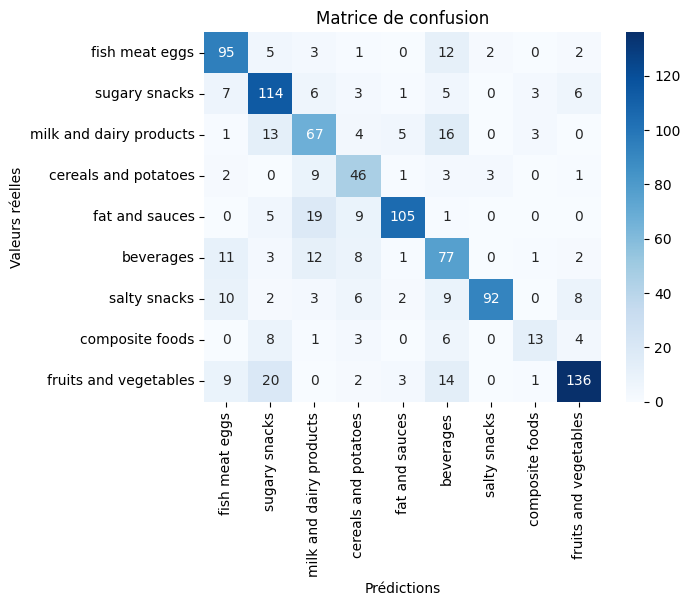

In [239]:
cm = confusion_matrix(y_test_original, y_pred)
cm.shape
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pnns_group_names, yticklabels=pnns_group_names)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')
plt.show()

In [240]:

# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
df_missing['pnns_groups_1_encoded'] = label_encoder.transform(df_missing['pnns_groups_1'])

X_missing = vectorizer.transform(df_missing['ingredients_text'])

In [241]:
# Prédiction des valeurs manquantes
missing_pred_encoded = knn.predict(X_missing)

In [242]:
# Conversion des labels du DataFrame non manquant en utilisant l'encodeur ajusté
missing_pred = label_encoder.inverse_transform(missing_pred_encoded)
missing_pred.shape[0]

191127

<Axes: >

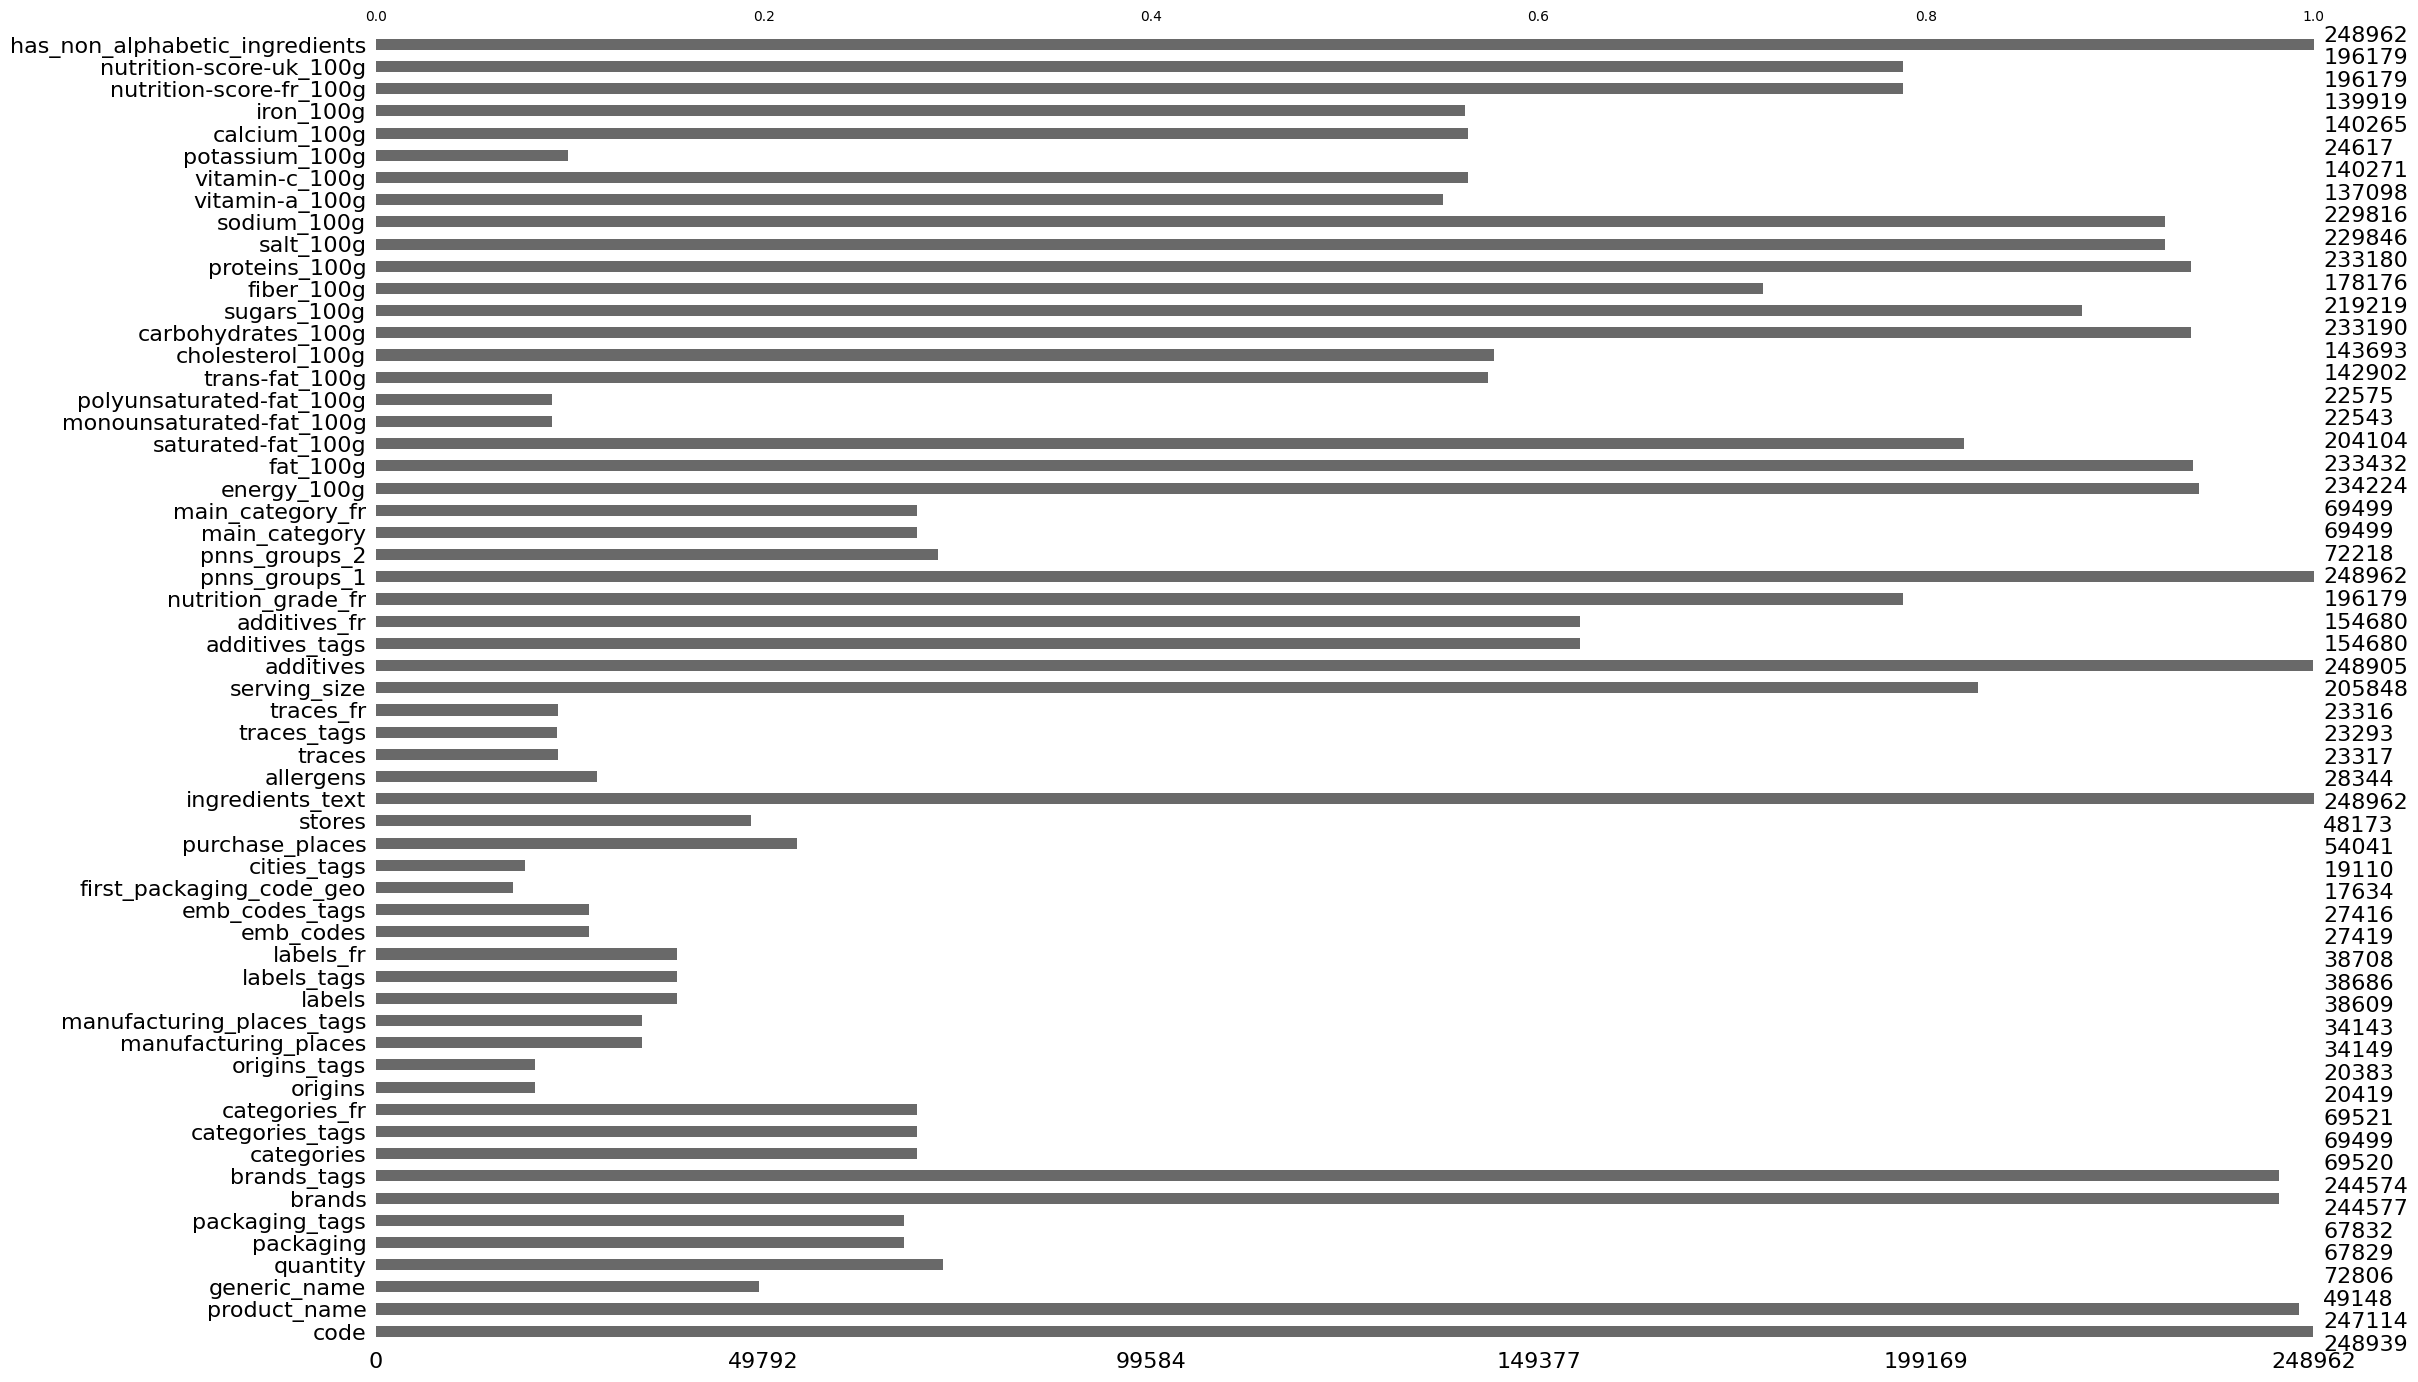

In [243]:
# Ajout des prédictions au DataFrame d'origine
df_cleaned.loc[df_missing.index, 'pnns_groups_1'] = missing_pred
msno.bar(df_cleaned)

In [244]:
df_pnns2 = df_cleaned['pnns_groups_1']
counts = df_pnns2.value_counts()
percentages_after = df_cleaned['pnns_groups_1'].value_counts(normalize=True) * 100
# Créer un DataFrame combiné pour la comparaison
percentages_comparison = pd.DataFrame({
    'Classe': percentages_before.index,
    'Pourcentage_Avant': percentages_before.values,
    'Pourcentage_Apres': percentages_after[percentages_before.index].values
})
fig = px.bar(percentages_comparison, x='Classe', y=['Pourcentage_Avant', 'Pourcentage_Apres'],
             barmode='group',
             labels={'value': 'Pourcentage (%)', 'variable': 'Condition'},
             title='Comparaison des pourcentages avant et après prédiction')

# Afficher le graphique
fig.show()

In [245]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Filtrer uniquement les colonnes qui se terminent par '_100g'
df_100g = df_cleaned.filter(like='_100g')
# Add 'pnns_groups_1' to df_100g
df_100g['pnns_groups_1'] = df_cleaned['pnns_groups_1']

# Function to fill NaN values with the mean of the group and filter outliers of this group
def fill_na_with_group_mean(group):
    group.fillna(group.mean(), inplace=True)
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((group < (Q1 - 1.5 * IQR)) | (group > (Q3 + 1.5 * IQR))).any(axis=1)
    return group[mask]

# Apply the function to each group
df_numeric2 = df_100g.groupby('pnns_groups_1').apply(fill_na_with_group_mean).reset_index(drop=True)
# Display the first few rows of the updated DataFrame
print(df_numeric2.head())

   energy_100g  fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
0        177.0       0.0                 0.0                  4.899461   
1        177.0       0.0                 0.0                  4.899461   
2         75.0       0.0                 0.0                  4.899461   
3         79.0       0.0                 0.0                  4.899461   
4        172.0       0.0                 0.0                  4.899461   

   polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  \
0                  3.250516        0.026339          0.007223   
1                  3.250516        0.026339          0.007223   
2                  3.250516        0.000000          0.000000   
3                  3.250516        0.000000          0.000000   
4                  3.250516        0.000000          0.000000   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0               10.40        10.40    0.000000           0.00    0.02540   
1           

In [246]:
# Standardisation des données
scaler2 = StandardScaler()
df_scaled2 = scaler2.fit_transform(df_numeric2)
# Création de l'objet PCA 2
pca2 = PCA()

In [247]:
# Ajustement de l'ACP sur les données standardisées
pca2.fit(df_scaled2)

# Création d'un DataFrame avec les composantes principales
df_pca_components2 = pd.DataFrame(pca2.components_, columns=df_numeric2.columns)


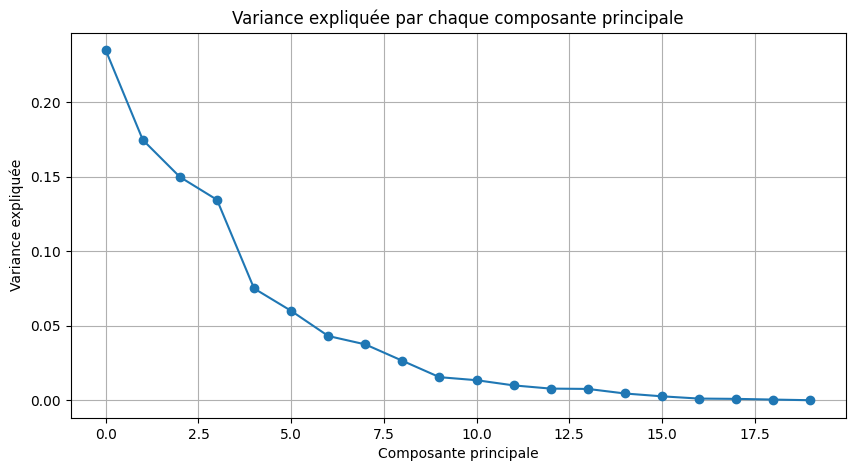

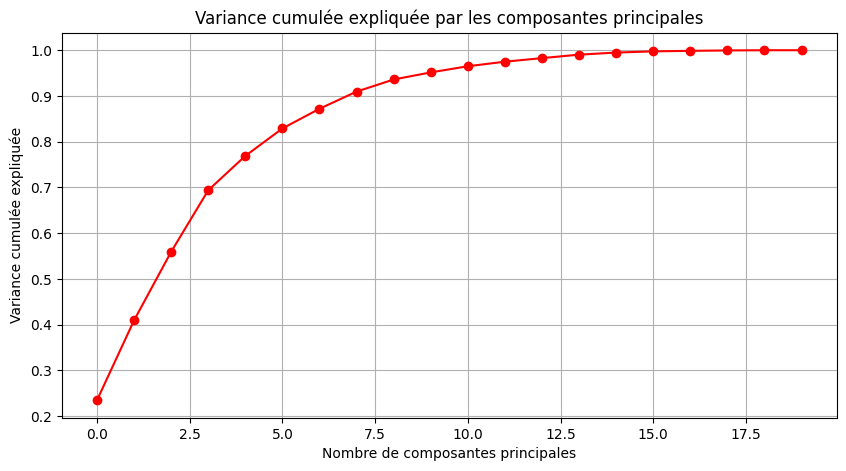

In [248]:
# Affichage
plt.figure(figsize=(10, 5))
plt.plot(pca2.explained_variance_ratio_, marker='o')
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.grid(True)
plt.show()

# Affichage de la variance cumulée expliquée par les composantes principales
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca2.explained_variance_ratio_), marker='o', color='red')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.grid(True)
plt.show()

on voit ici que presque 80% de variance correspond a 5 composantes nous allons donc nous limiter a 5 pour la suite


In [249]:
pca3 = PCA(n_components=5)
# Ajustement de l'ACP sur les données standardisées
pca3_result = pca3.fit_transform(df_scaled2 , )

# Création d'un DataFrame avec les composantes principales
df_pca_components3 = pd.DataFrame(pca3_result,columns=[f'PC{i+1}' for i in range(pca3_result.shape[1])])

df_pca_components3

PC1       PC2       PC3       PC4       PC5
0      -1.730838  0.001796 -1.053676 -0.396395 -1.494636
1      -1.661466  0.367721 -0.995898  0.144354 -0.625385
2      -3.043744 -0.057927 -0.835729 -0.792046 -0.891973
3      -2.721668 -0.199391 -0.137017 -0.473962 -1.270624
4      -3.098335  0.643871 -0.461894 -0.496107 -1.200631
...          ...       ...       ...       ...       ...
117673 -0.956224  1.502100 -0.897421  0.243793 -0.090282
117674 -1.144685  1.618573 -0.949873  0.520557  0.371343
117675  2.713839  2.244881 -0.234147  0.291316 -0.010543
117676  2.713839  2.244881 -0.234147  0.291316 -0.010543
117677  2.713839  2.244881 -0.234147  0.291316 -0.010543

[117678 rows x 5 columns]

In [250]:
pca3_result

array([[-1.73083818e+00,  1.79585666e-03, -1.05367640e+00,
        -3.96394515e-01, -1.49463568e+00],
       [-1.66146647e+00,  3.67720847e-01, -9.95897880e-01,
         1.44354347e-01, -6.25384965e-01],
       [-3.04374424e+00, -5.79269767e-02, -8.35728944e-01,
        -7.92045515e-01, -8.91973454e-01],
       ...,
       [ 2.71383866e+00,  2.24488115e+00, -2.34147158e-01,
         2.91315908e-01, -1.05430042e-02],
       [ 2.71383866e+00,  2.24488115e+00, -2.34147158e-01,
         2.91315908e-01, -1.05430042e-02],
       [ 2.71383866e+00,  2.24488115e+00, -2.34147158e-01,
         2.91315908e-01, -1.05430042e-02]])

In [251]:
pca_components_df = pd.DataFrame(
    pca3.components_.T,
    index=df_numeric2.columns,
    columns=[f'PC{i+1}' for i in range(pca3.n_components_)]
)
pca_components_df

PC1       PC2       PC3       PC4       PC5
energy_100g               0.349531  0.230963  0.047718  0.116405  0.073346
fat_100g                  0.373305  0.011967  0.071503 -0.047017  0.045566
saturated-fat_100g        0.372816  0.041867 -0.085974 -0.147514 -0.023593
monounsaturated-fat_100g -0.037644 -0.061181  0.445461 -0.241280  0.141225
polyunsaturated-fat_100g -0.055249 -0.017153  0.480279 -0.177647  0.183921
trans-fat_100g            0.151970  0.018095 -0.185173  0.260724  0.350338
cholesterol_100g          0.209144 -0.342231 -0.232315 -0.150611  0.020389
carbohydrates_100g        0.152928  0.382863  0.015480  0.161073  0.040524
sugars_100g               0.179279  0.347129 -0.039122 -0.023556 -0.254678
fiber_100g                0.020225  0.206086  0.003012  0.267376  0.424237
proteins_100g             0.218505 -0.237313 -0.044947  0.208020  0.075185
salt_100g                 0.188235 -0.265976  0.332057  0.077603  0.195363
sodium_100g               0.188276 -0.266109  0.331954  0.077673  0.195330
vitamin-a_100g            0.103839 -0.193764 -0.344895 -0.341344  0.152519
vitamin-c_100g            0.048624 -0.348526  0.006827  0.306839 -0.324706
potassium_100g            0.100964 -0.323181  0.022378  0.354438 -0.324735
calcium_100g              0.146943 -0.165267 -0.300623 -0.291919  0.316821
iron_100g                 0.032142  0.040334 -0.115352  0.430572  0.265467
nutrition-score-fr_100g   0.382735  0.115902  0.101910 -0.097226 -0.220382
nutrition-score-uk_100g   0.401448  0.100053  0.100176 -0.111233 -0.181785

In [273]:
# TODO definir les PC


PC1 : produits gras
PC2 : produits sucrés
PC3 : produits salés gras
PC4 : fruits et légumes ( fibre vitamines ... )
PC5 : produits laitiers


In [253]:
#df_pca3 = pd.DataFrame(pca3.transform(df_scaled2), columns=[f'PC{i+1}' for i in range(df_scaled2.shape[1])])
df_pca2 = pd.DataFrame(pca2.transform(df_scaled2), columns=[f'PC{i+1}' for i in range(df_scaled2.shape[1])])
print(df_pca2.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.730838  0.001796 -1.053676 -0.396395 -1.494636 -0.934948  0.503293   
1 -1.661466  0.367721 -0.995898  0.144354 -0.625385 -0.692837  0.148102   
2 -3.043744 -0.057927 -0.835729 -0.792046 -0.891973  0.804266  0.349990   
3 -2.721668 -0.199391 -0.137017 -0.473962 -1.270624  0.565168  0.747258   
4 -3.098335  0.643871 -0.461894 -0.496107 -1.200631  0.815412  0.252895   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.536136 -0.398361  0.480650 -0.280051 -0.375622 -0.533355  0.444029   
1 -0.880918  1.087065  0.138881 -0.310483 -0.441535 -0.798325  0.300394   
2 -1.018036 -0.153252 -0.194888  0.027564  0.081027  0.007705 -0.212342   
3 -1.133001 -0.172305 -0.226804  0.101738  0.122435  0.137427  0.074605   
4 -0.933212 -0.024178 -0.482130  0.123801  0.259651  0.164923 -0.122687   

       PC15      PC16      PC17      PC18      PC19      PC20  
0  0.249174 -0.416826 -0.063191 -0

In [254]:
# Graphique des corrélations
def correlationgraph(pca2, features):
    plt.figure(figsize=(12, 12))
    for i in range(pca2.components_.shape[1]):
        plt.arrow(0, 0, pca2.components_[0, i], pca2.components_[1, i], 
                  head_width=0.05, head_length=0.05, color='red')
        plt.text(pca2.components_[0, i] + 0.05, pca2.components_[1, i] + 0.05, 
                 features[i], color='red', ha='center', va='center', fontsize=12)

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC1 ({pca2.explained_variance_ratio_[0] * 100:.1f}%)', fontsize=14)
    plt.ylabel(f'PC2 ({pca2.explained_variance_ratio_[1] * 100:.1f}%)', fontsize=14)
    plt.grid()
    plt.axhline(0, color='grey', ls='--')
    plt.axvline(0, color='grey', ls='--')
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', ls='--')
    plt.gca().add_artist(circle)
    plt.title('Cercle des corrélations', fontsize=16)
    plt.show()


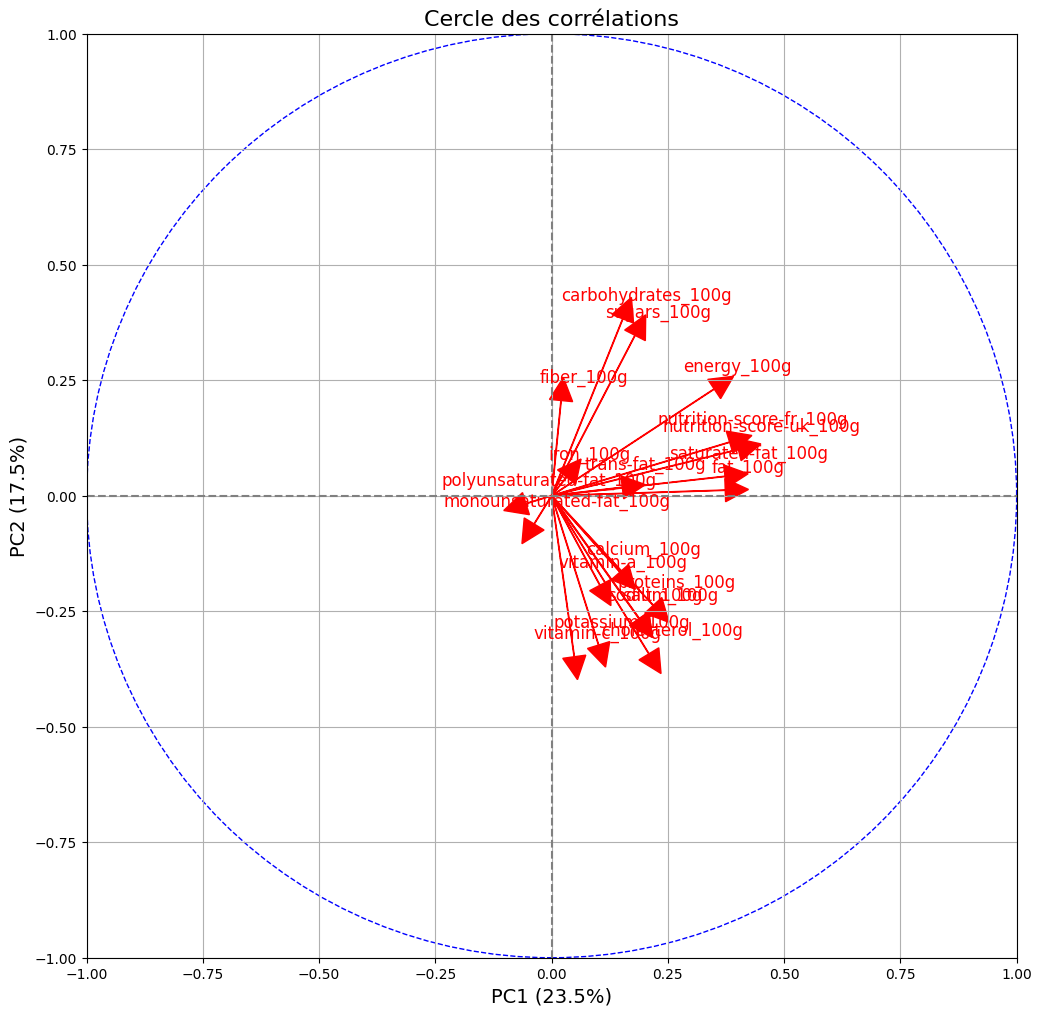

In [255]:
# Appel de la fonction avec les colonnes numériques de votre DataFrame
correlationgraph(pca2, df_numeric2.columns)


In [256]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

In [257]:
columns_with_missing_values = ['sugars_100g','carbohydrates_100g','proteins_100g','nutrition-score-fr_100g']
columns_without_missing_values = ['sugars_100g','carbohydrates_100g','proteins_100g','nutrition-score-fr_100g']

df_test=df_cleaned[columns_without_missing_values]
df_test = df_test.dropna(subset='sugars_100g')
df_test.describe()

sugars_100g  carbohydrates_100g  proteins_100g  \
count  219219.000000       218112.000000  218337.000000   
mean       16.131918           33.353515       7.116686   
std        22.570799           29.702907       8.208683   
min       -17.860000            0.000000    -800.000000   
25%         1.330000            6.900000       0.830000   
50%         5.880000           23.080000       4.850000   
75%        24.240000           60.000000      10.000000   
max      3520.000000         2916.670000     430.000000   

       nutrition-score-fr_100g  
count            196030.000000  
mean                  9.152818  
std                   9.062774  
min                 -15.000000  
25%                   1.000000  
50%                  10.000000  
75%                  16.000000  
max                  40.000000

In [258]:

imputer.fit(df_test[columns_with_missing_values])

IterativeImputer(random_state=0)

sugars_100g  carbohydrates_100g  proteins_100g  \
count  219219.000000       219219.000000  219219.000000   
mean       16.131918           33.382544       7.114635   
std        22.570799           30.722901       8.196022   
min       -17.860000            0.000000    -800.000000   
25%         1.330000            7.000000       0.830000   
50%         5.880000           23.080000       4.900000   
75%        24.240000           60.000000      10.000000   
max      3520.000000         3745.945983     430.000000   

       nutrition-score-fr_100g  
count            219219.000000  
mean                  9.245423  
std                   8.804810  
min                -188.848139  
25%                   2.000000  
50%                   9.000000  
75%                  16.000000  
max                  49.370267

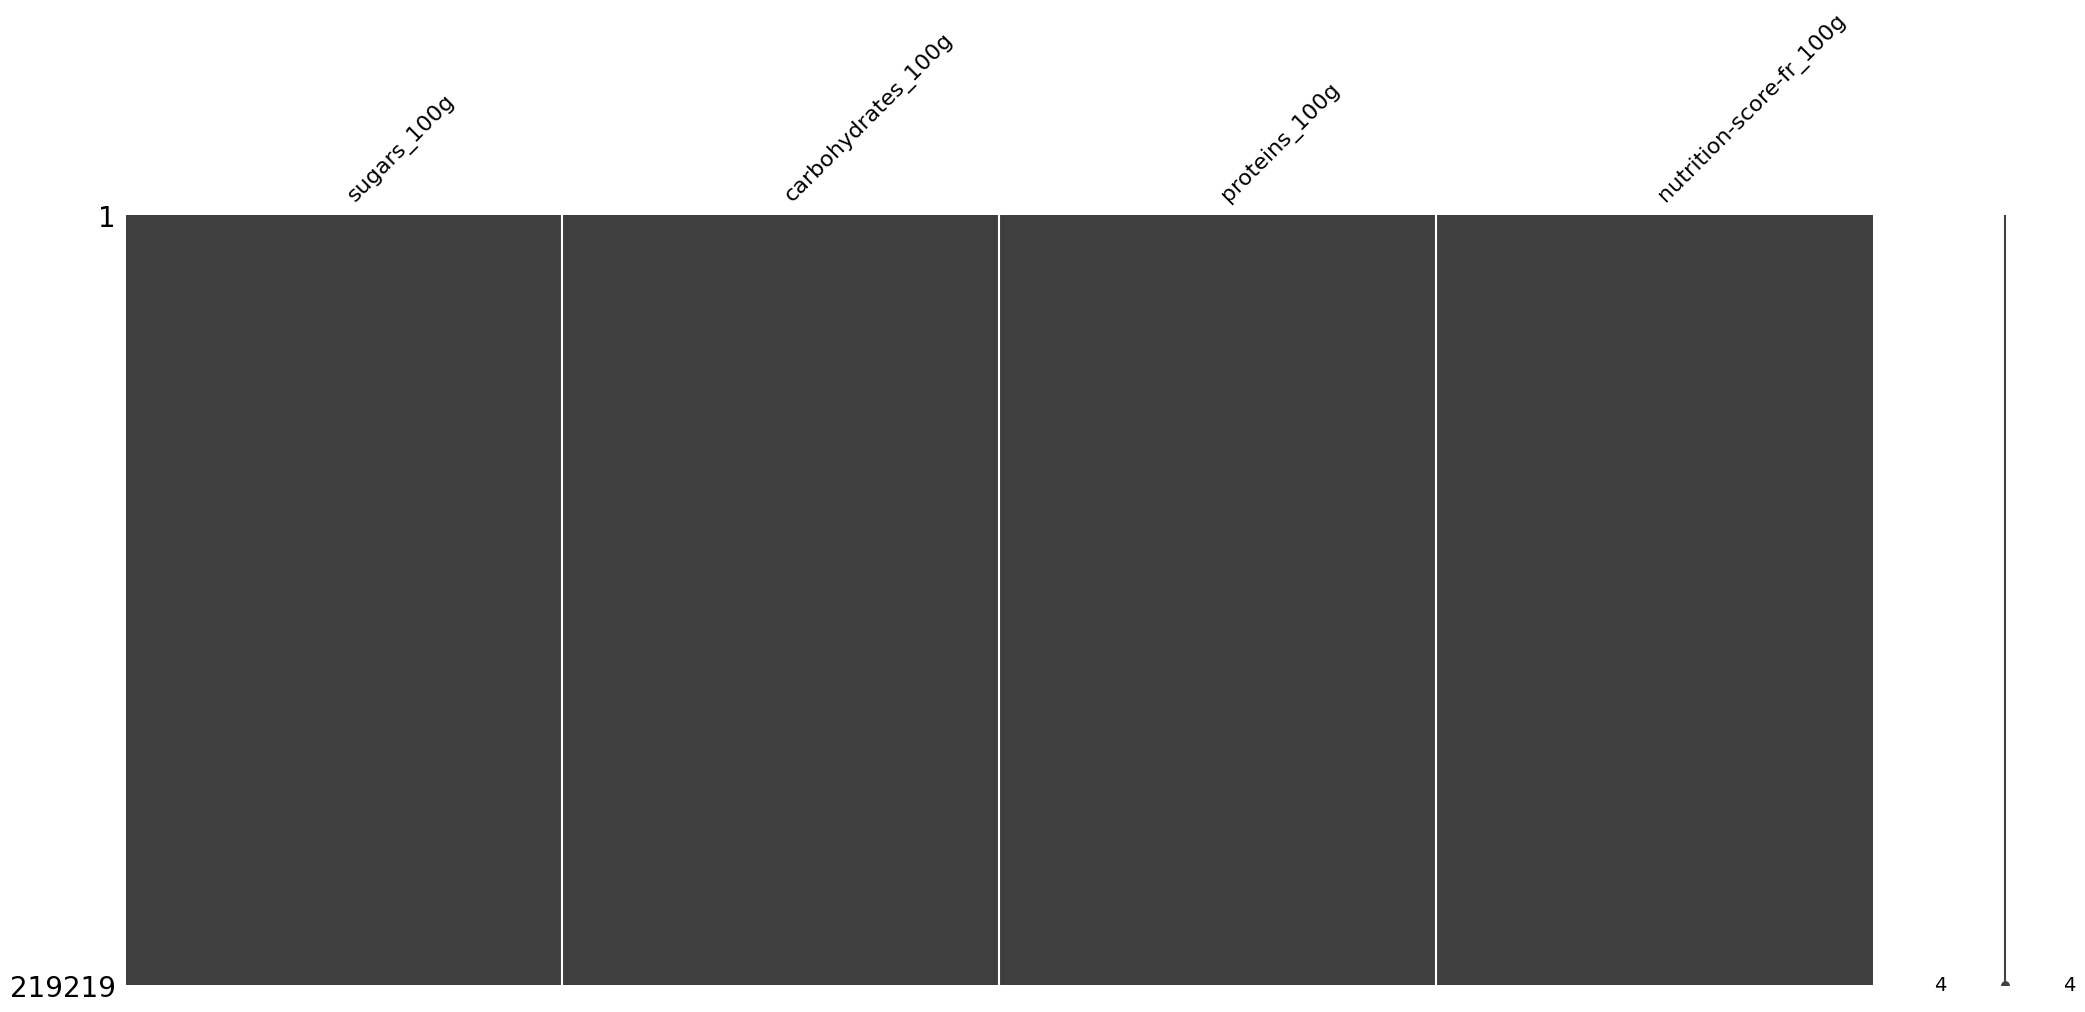

In [259]:
data_imputed = imputer.transform(df_test[columns_with_missing_values])
df_test[columns_with_missing_values] = data_imputed
msno.matrix(df_test)
df_test.describe()

In [260]:
import scipy.stats as st

print("pearson : ",st.pearsonr(df_test["nutrition-score-fr_100g"],df_test["sugars_100g"])[0])
print("covariance : ",np.cov(df_test["nutrition-score-fr_100g"],df_test["sugars_100g"],ddof=0)[1,0])

pearson :  0.4802181455467847
covariance :  95.43407810853488


C:\Users\devil\AppData\Local\Temp\ipykernel_14708\154111382.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



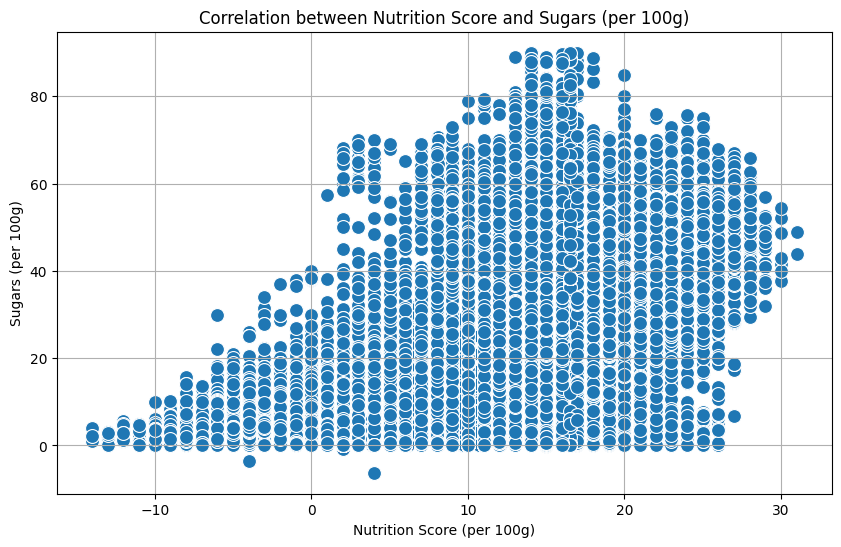

In [261]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric2, x='nutrition-score-fr_100g', y='sugars_100g',  palette='viridis', s=100)
plt.title('Correlation between Nutrition Score and Sugars (per 100g)')
plt.xlabel('Nutrition Score (per 100g)')
plt.ylabel('Sugars (per 100g)')
plt.grid(True)
plt.show()

C:\Users\devil\AppData\Local\Temp\ipykernel_14708\3123681554.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



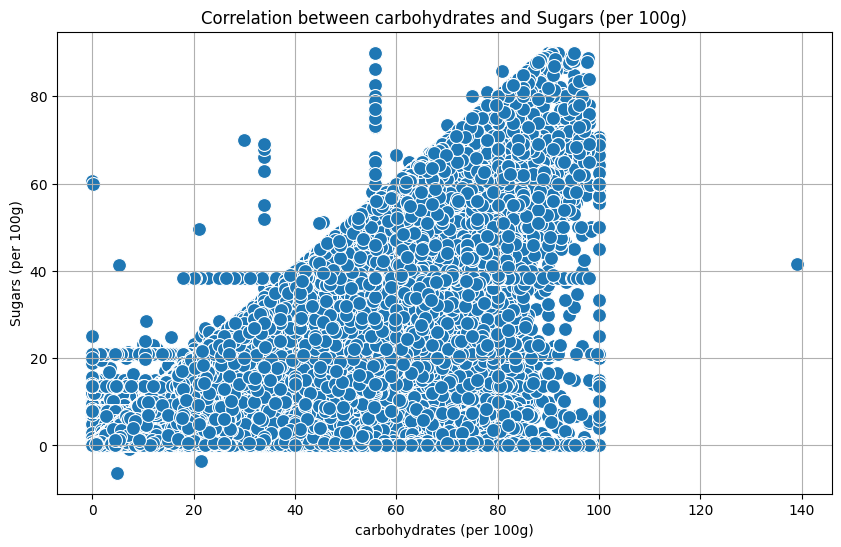

In [262]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric2, x='carbohydrates_100g', y='sugars_100g',  palette='viridis', s=100)
plt.title('Correlation between carbohydrates and Sugars (per 100g)')
plt.xlabel('carbohydrates (per 100g)')
plt.ylabel('Sugars (per 100g)')
plt.grid(True)
plt.show()

C:\Users\devil\AppData\Local\Temp\ipykernel_14708\1086325253.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



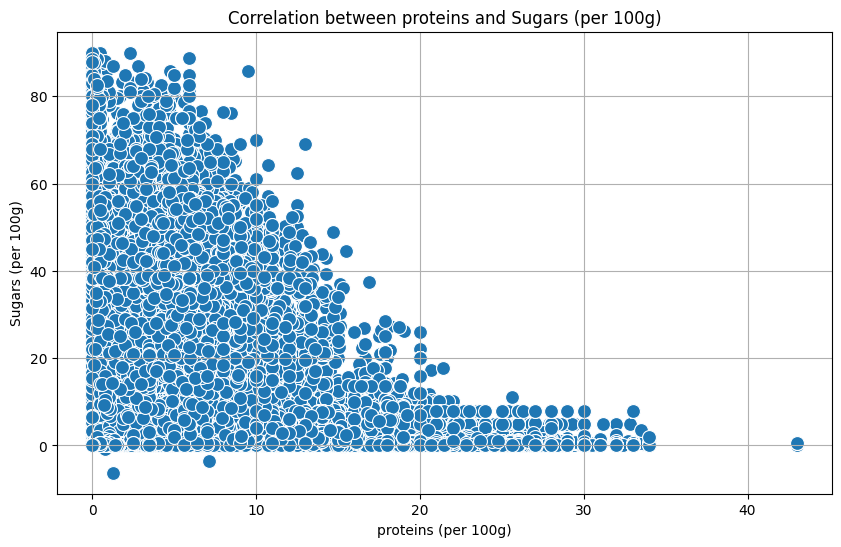

In [263]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric2, x='proteins_100g', y='sugars_100g',  palette='viridis', s=100)
plt.title('Correlation between proteins and Sugars (per 100g)')
plt.xlabel('proteins (per 100g)')
plt.ylabel('Sugars (per 100g)')
plt.grid(True)
plt.show()

In [264]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
# Filtrer uniquement les colonnes qui se terminent par '_100g'
df_100g = df_cleaned.filter(like='_100g')
# Add 'pnns_groups_1' to df_100g
df_100g['pnns_groups_1'] = df_cleaned['pnns_groups_1']

# Function to fill NaN values with the mean of the group and filter outliers of this group
def fill_na_with_group_mean(group):
    group.fillna(group.mean(), inplace=True)
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((group < (Q1 - 1.5 * IQR)) | (group > (Q3 + 1.5 * IQR))).any(axis=1)
    return group[mask]

# Apply the function to each group
df_numeric2 = df_100g.groupby('pnns_groups_1').apply(fill_na_with_group_mean).reset_index(drop=True)
df_numeric2 = df_numeric2.sample(15000)

In [265]:
df_numeric2['pnns_groups_1'] = df_cleaned['pnns_groups_1']
df_numeric2.dropna(subset=['nutrition-score-fr_100g'])
df_numeric2=df_numeric2.rename(columns={'nutrition-score-fr_100g': 'nutritionScoreFr_100g'})
df_numeric2.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'potassium_100g',
       'calcium_100g', 'iron_100g', 'nutritionScoreFr_100g',
       'nutrition-score-uk_100g', 'pnns_groups_1'],
      dtype='object')

In [266]:
groups = df_numeric2.groupby('pnns_groups_1')
group_sizes = df_numeric2['pnns_groups_1'].value_counts()
print(df_numeric2['nutritionScoreFr_100g'].isnull().sum())
print("Number of missing values in 'nutritionScoreFr_100g':", df_numeric2['nutritionScoreFr_100g'].isnull().sum())

0
Number of missing values in 'nutritionScoreFr_100g': 0


In [267]:
# Apply the Shapiro-Wilk test for each group
groups = df_numeric2.groupby('pnns_groups_1')['nutritionScoreFr_100g']
shapiro_results = {}
for group_name, group_data in groups:
    if len(group_data) >= 3:  # Vérifier si le groupe a au moins 3 observations
        stat, p_value = stats.shapiro(group_data)
        shapiro_results[group_name] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}
    else:
        shapiro_results[group_name] = {'Shapiro-Wilk Statistic': np.nan, 'p-value': np.nan}

# Afficher les résultats dans un DataFrame
shapiro_df = pd.DataFrame(shapiro_results).T
print(shapiro_df)

                         Shapiro-Wilk Statistic       p-value
beverages                              0.988597  3.852345e-11
cereals and potatoes                   0.983442  9.718671e-13
composite foods                        0.985709  3.045863e-02
fat and sauces                         0.984450  2.898515e-19
fish meat eggs                         0.984969  6.918979e-07
fruits and vegetables                  0.984942  7.887472e-19
milk and dairy products                0.976718  1.502210e-07
salty snacks                           0.982754  2.309277e-11
sugary snacks                          0.985863  7.018133e-09


In [268]:
from scipy.stats import levene
grouped_data = [group['nutritionScoreFr_100g'].dropna() for name, group in df_numeric2.groupby('pnns_groups_1')]
levene_test = levene(*grouped_data)

# Afficher les résultats
print("Statistique de test de Levene:", levene_test.statistic)
print("p-value:", levene_test.pvalue)

# Interprétation des résultats
alpha = 0.05
if levene_test.pvalue < alpha:
    print("On rejette l'hypothèse nulle, les variances ne sont pas égales (il y a une différence significative).")
else:
    print("On ne peut pas rejeter l'hypothèse nulle, les variances sont égales (pas de différence significative).")

Statistique de test de Levene: 1.7936665580560267
p-value: 0.07320015090608481
On ne peut pas rejeter l'hypothèse nulle, les variances sont égales (pas de différence significative).


In [269]:
X = "pnns_groups_1" # qualitative
Y = "nutritionScoreFr_100g" # quantitative
sous_echantillon = df_numeric2.dropna(subset=[Y])
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_groupe': yi_classe.mean()})
  
    
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_groupe']-moyenne_y)**2 for c in classes])
    print('SCE : ',SCE)
    print('SCT : ',SCT)
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

SCE :  nan
SCT :  835408.4572512849


nan

In [270]:
df_numeric2[X].unique()
df_numeric2[Y].mean()

7.204391630389134

In [271]:

# Fit the model
model = ols('nutritionScoreFr_100g ~ C(pnns_groups_1)', data=df_numeric2).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq       df         F    PR(>F)
C(pnns_groups_1)    2028.984252      8.0  4.636735  0.000011
Residual          790231.045866  14447.0       NaN       NaN


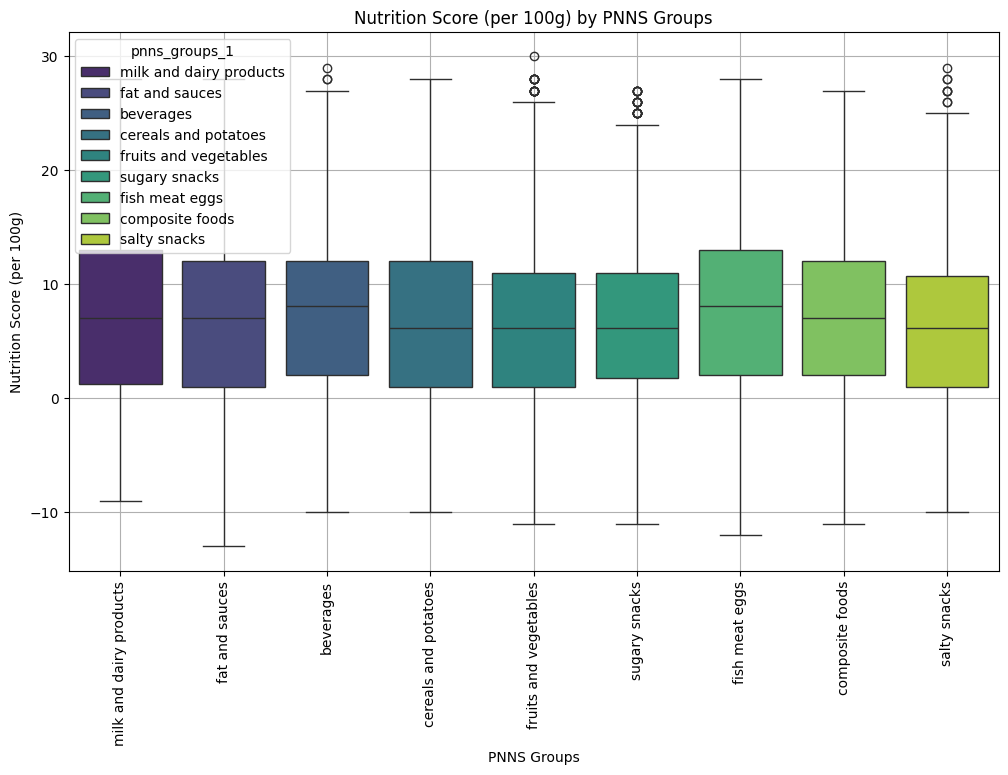

In [272]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pnns_groups_1', y='nutritionScoreFr_100g', data=df_numeric2, palette='viridis', hue='pnns_groups_1', dodge=False)
plt.title('Nutrition Score (per 100g) by PNNS Groups')
plt.xlabel('PNNS Groups')
plt.ylabel('Nutrition Score (per 100g)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Interprétation des Résultats d'ANOVA
Sum of Squares (Sum_sq):

C(pnns_groups_1): 2028.984252 représente la variabilité entre les groupes.
Residual: 790231.045866 représente la variabilité à l'intérieur des groupes.
Degrees of Freedom (df):

C(pnns_groups_1): 8.0 degrés de liberté pour les groupes.
Residual: 14447.0 degrés de liberté pour les résidus.
F-Statistic (F): La statistique F de 4.636735 est le rapport de la variance expliquée par le modèle à la variance inexpliquée (résiduelle).

p-value (PR(>F)): La p-value de 0.000011 indique que les différences observées entre les groupes sont statistiquement significatives.



In [275]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
groups = df_numeric2.groupby('pnns_groups_1')['nutritionScoreFr_100g'].apply(list)
kruskal_result = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {kruskal_result.statistic}")
print(f"p-value: {kruskal_result.pvalue}")

Kruskal-Wallis H-statistic: 33.640954935085816
p-value: 4.7184748520724984e-05


## Interprétation
La p-value du test de Kruskal-Wallis est très petite (4.7184748520724984e-05), ce qui est bien inférieur au niveau de signification couramment utilisé de 0.05.

## Conclusion
Puisque la p-value (0.000011) est bien inférieure au seuil de signification couramment utilisé de 0.05, nous rejetons l'hypothèse nulle selon laquelle il n'y a pas de différence significative entre les groupes de pnns_groups_1. Cela signifie qu'il existe une différence statistiquement significative dans les scores nutritionnels entre les différentes catégories d'aliments.

## Comparaison ANOVA avec le Test de Kruskal-Wallis
Les résultats de l'ANOVA et du test de Kruskal-Wallis montrent tous deux des différences significatives entre les groupes de catégories d'aliments. Bien que l'ANOVA présuppose que les données suivent une distribution normale (ce qui peut ne pas être le cas selon les résultats de votre test de Shapiro-Wilk), le test de Kruskal-Wallis est non paramétrique et ne fait pas cette hypothèse.

## Étapes Suivantes
Pour approfondir l'analyse, nous pourrions effectuer des tests post-hoc pour identifier les paires de groupes spécifiques qui diffèrent significativement. Nous pourrions utiliser des tests comme le test de Tukey pour l'ANOVA ou le test de Dunn pour le Kruskal-Wallis.